In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pyvis.network import Network
import json

In [2]:
# Importing the library
import psutil
 
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

RAM memory % used: 3.4
RAM Used (GB): 1.15482624


In [3]:
import psutil

# Get RAM information
ram = psutil.virtual_memory()

# Print RAM capacity in bytes, kilobytes, megabytes, and gigabytes
print(f"Total RAM: {ram.total} bytes, {ram.total / (1024 ** 1):.2f} KB, {ram.total / (1024 ** 2):.2f} MB, {ram.total / (1024 ** 3):.2f} GB")


Total RAM: 12534235136 bytes, 12240464.00 KB, 11953.58 MB, 11.67 GB


In [21]:
!pip install networkx

In [9]:
import networkx as nx

### 1.Bipartite

In [55]:
!pip  install pyvis

     ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
      --------------------------------------- 10.2/756.0 kB ? eta -:--:--
     --- --------------------------------- 61.4/756.0 kB 812.7 kB/s eta 0:00:01
     ----- ------------------------------ 112.6/756.0 kB 930.9 kB/s eta 0:00:01
     ------- ------------------------------ 153.6/756.0 kB 1.0 MB/s eta 0:00:01
     ---------- --------------------------- 204.8/756.0 kB 1.0 MB/s eta 0:00:01
     ------------- ------------------------ 276.5/756.0 kB 1.1 MB/s eta 0:00:01
     --------------- ---------------------- 317.4/756.0 kB 1.1 MB/s eta 0:00:01
     ------------------- ------------------ 389.1/756.0 kB 1.1 MB/s eta 0:00:01
     --------------------- ---------------- 430.1/756.0 kB 1.1 MB/s eta 0:00:01
     ------------------------ ------------- 491.5/756.0 kB 1.1 MB/s eta 0:00:01
     --------------------------- ---------- 542.7/756.0 kB 1.1 MB/s eta 0:00:01
     ----------------------------- -------- 593.9/756

In [57]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


### Read Dataset

In [3]:
import json
with open('DataSet.json', 'r',encoding='utf-8') as file:
    json_data = json.load(file)

# Transform the data
transformed_data = []
for item in json_data:
    key = item.get('key', None)
    authors = item.get('authors', [])
    transformed_data.append({'type': 'incollection', 'key': key, 'authors': authors})

In [6]:
print(transformed_data[:10])

[{'type': 'incollection', 'key': 'reference/vision/X14bd', 'authors': []}, {'type': 'incollection', 'key': 'reference/vision/Singh14', 'authors': ['Manish Singh 0001']}, {'type': 'incollection', 'key': 'reference/vision/X14ii', 'authors': []}, {'type': 'incollection', 'key': 'reference/vision/X14m', 'authors': []}, {'type': 'incollection', 'key': 'reference/vision/Wong14', 'authors': ['Tien-Tsin Wong']}, {'type': 'incollection', 'key': 'reference/vision/X14gt', 'authors': []}, {'type': 'incollection', 'key': 'reference/vision/Pont14b', 'authors': ['Sylvia C. Pont']}, {'type': 'incollection', 'key': 'reference/vision/Alexander14', 'authors': ['Daniel C. Alexander']}, {'type': 'incollection', 'key': 'reference/vision/Fukui14', 'authors': ['Kazuhiro Fukui']}, {'type': 'incollection', 'key': 'reference/vision/X14if', 'authors': []}]


In [8]:
bottom_nodes = []  # Authors
top_nodes = []     # Keys

for item in transformed_data:
    key = item['key']
    authors = item['authors']

    bottom_nodes.extend(authors)
    top_nodes.append(key)

# Remove possible duplicates and sort the lists
bottom_nodes = list(set(bottom_nodes))
top_nodes = sorted(top_nodes, key=lambda x: (x is None, x))

# Print the resulting lists
print("top_nodes:", top_nodes[:10])
print("bottom_nodes:", bottom_nodes[:10])


top_nodes: ['books/acm/0082477', 'books/acm/17/CohenO17', 'books/acm/17/FreemanWVNPB17', 'books/acm/17/Hinckley17', 'books/acm/17/JamesLSCO17', 'books/acm/17/JamesVM17', 'books/acm/17/JamesonK17', 'books/acm/17/KatsamanisPTM17', 'books/acm/17/KoppB17', 'books/acm/17/MacLeanSS17']
bottom_nodes: ['Elizabeth S. Cooper', 'Kotaro Yatsugi', 'Fernando H. L. Buzato', 'Jessica Vamathevan', 'Christian D. Bope', 'D. A. Derradji', 'Otis M. Solomon Jr.', 'Harsha M. N', 'Patrizia Knabl', 'Min Zhang 0037']


In [15]:
df = pd.DataFrame(transformed_data[100:])

# Display the last few rows
df.tail()

,type,key,authors
10237111,incollection,persons/Codd71b,[E. F. Codd]
10237112,incollection,persons/Codd71,[E. F. Codd]
10237113,incollection,persons/Hall74,[Patrick A. V. Hall]
10237114,incollection,persons/Codd69,[E. F. Codd]
10237115,incollection,persons/Ley95,[Michael Ley]


In [18]:
key_author_tuples = [(item['key'], item['authors']) for item in transformed_data if item['authors']]

[('reference/vision/Zickler14', ['Todd E. Zickler']),
 ('reference/vision/Beyerer14', ['Jürgen Beyerer']),
 ('reference/vision/Rusinkiewicz14', ['Szymon Rusinkiewicz']),
 ('reference/vision/Agrawal14', ['Amit K. Agrawal']),
 ('reference/vision/ShenGCB14',
  ['Rui Shen', 'Gaopeng Gou', 'Irene Cheng 0001', 'Anup Basu']),
 ('reference/vision/Pietikainen14', ['Matti Pietikäinen']),
 ('reference/vision/Agrawal14a', ['Amit K. Agrawal']),
 ('reference/vision/Basri14', ['Ronen Basri']),
 ('reference/vision/Zach14', ['Christopher Zach']),
 ('reference/vision/Koenderink14c', ['Jan J. Koenderink']),
 ('reference/vision/Tappen14a', ['Marshall F. Tappen']),
 ('reference/vision/Tai14', ['Yu-Wing Tai']),
 ('reference/vision/Chan14a', ['Shing-Chow Chan']),
 ('reference/vision/Sturm14a', ['Peter F. Sturm']),
 ('reference/vision/DickinsonSS14',
  ['Sven J. Dickinson', 'Ali Shokoufandeh', 'Kaleem Siddiqi']),
 ('reference/vision/Wu14b', ['Ying Nian Wu']),
 ('reference/vision/Koppal14a', ['Sanjeev J. Koppa

In [19]:
key_author_tuples[-10:]

[('persons/CasperGGGHLR12',
  ['Markus Casper',
   'Gayane Grigoryan',
   'Oliver Gronz',
   'Oliver Gutjahr',
   'Günther Heinemann',
   'Rita Ley',
   'Andreas Rock']),
 ('persons/Codd71a', ['E. F. Codd']),
 ('persons/Lions1996', ['John Lions']),
 ('persons/Codd72', ['E. F. Codd']),
 ('persons/Codd74', ['E. F. Codd']),
 ('persons/Codd71b', ['E. F. Codd']),
 ('persons/Codd71', ['E. F. Codd']),
 ('persons/Hall74', ['Patrick A. V. Hall']),
 ('persons/Codd69', ['E. F. Codd']),
 ('persons/Ley95', ['Michael Ley'])]

In [21]:

key_author_tuples = []

for item in transformed_data:
    key = item['key']
    authors = item['authors']

    for author in authors:
        key_author_tuples.append((key, author))
"""
# Drucke die resultierenden Tupel
for tuple_item in key_author_tuples:
    print(tuple_item)
    """
data_2 = {'key': [], 'authors': []}

for key, author in key_author_tuples:
    data_2['key'].append(key)
    data_2['authors'].append(author)   


TypeError: unhashable type: 'slice'

In [22]:
df = pd.DataFrame(data_2)
df = df[df['authors'].apply(lambda x: bool(x))]
df

,key,authors
0,reference/vision/Singh14,Manish Singh 0001
1,reference/vision/Wong14,Tien-Tsin Wong
2,reference/vision/Pont14b,Sylvia C. Pont
3,reference/vision/Alexander14,Daniel C. Alexander
4,reference/vision/Fukui14,Kazuhiro Fukui
...,...,...
22006592,persons/Codd71b,E. F. Codd
22006593,persons/Codd71,E. F. Codd
22006594,persons/Hall74,Patrick A. V. Hall
22006595,persons/Codd69,E. F. Codd


### Save DataFrame

In [23]:
df.to_csv('dataset.csv', index=False)

### create a Network

In [32]:
from IPython.display import display, Markdown
# Erstellen Sie einen leeren bipartiten Graphen
G = nx.Graph()

# Hinzufügen von Knoten und Kanten zum Graphen basierend auf dem DataFrame
for _, row in df.iterrows():
    G.add_node(row['authors'], bipartite='authors')
    G.add_node(row['key'], bipartite='key')
    G.add_edge(row['authors'], row['key'])
    
# Gradverteilungen bestimmen
authors_degrees = dict(G.degree(df['authors'].unique()))
publication_degrees = dict(G.degree(df['key'].unique()))

# Statistiken der Publikationskomponenten
publication_components = list(nx.connected_components(G.subgraph(df['key'].unique())))
publication_component_sizes = [len(comp) for comp in publication_components]

# Gradverteilungen und Publikationskomponenten zum DataFrame hinzufügen
df['author_degree'] = df['authors'].map(authors_degrees)
df['key_degree'] = df['key'].map(publication_degrees)
df['key_component_size'] = df['key'].map({node: len(comp) for comp in publication_components for node in comp})

# DataFrame anzeigen

display(Markdown(df.to_markdown()))

|      | key                                  | authors                              |   author_degree |   key_degree |   key_component_size |
|-----:|:-------------------------------------|:-------------------------------------|----------------:|-------------:|---------------------:|
|    0 | reference/vision/Singh14             | Manish Singh 0001                    |               1 |            1 |                    1 |
|    1 | reference/vision/Wong14              | Tien-Tsin Wong                       |               1 |            1 |                    1 |
|    2 | reference/vision/Pont14b             | Sylvia C. Pont                       |               3 |            1 |                    1 |
|    3 | reference/vision/Alexander14         | Daniel C. Alexander                  |               1 |            1 |                    1 |
|    4 | reference/vision/Fukui14             | Kazuhiro Fukui                       |               1 |            1 |                    1 |
|    5 | reference/vision/SrivastavaPKTA14    | Gaurav Srivastava 0004               |               1 |            5 |                    1 |
|    6 | reference/vision/SrivastavaPKTA14    | Johnny Park                          |               1 |            5 |                    1 |
|    7 | reference/vision/SrivastavaPKTA14    | Avinash C. Kak                       |               1 |            5 |                    1 |
|    8 | reference/vision/SrivastavaPKTA14    | Birgi Tamersoy                       |               1 |            5 |                    1 |
|    9 | reference/vision/SrivastavaPKTA14    | J. K. Aggarwal                       |               1 |            5 |                    1 |
|   10 | reference/vision/Zhang14q            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|   11 | reference/vision/Gall14              | Juergen Gall                         |               1 |            1 |                    1 |
|   12 | reference/vision/Hartley14           | Richard I. Hartley                   |               1 |            1 |                    1 |
|   13 | reference/vision/PoggioU14           | Tomaso A. Poggio                     |               2 |            2 |                    1 |
|   14 | reference/vision/PoggioU14           | Shimon Ullman                        |               2 |            2 |                    1 |
|   15 | reference/vision/Zickler14           | Todd E. Zickler                      |               1 |            1 |                    1 |
|   16 | reference/vision/Beyerer14           | Jürgen Beyerer                       |               1 |            1 |                    1 |
|   17 | reference/vision/Rusinkiewicz14      | Szymon Rusinkiewicz                  |               1 |            1 |                    1 |
|   18 | reference/vision/Agrawal14           | Amit K. Agrawal                      |               2 |            1 |                    1 |
|   19 | reference/vision/ShenGCB14           | Rui Shen                             |               1 |            4 |                    1 |
|   20 | reference/vision/ShenGCB14           | Gaopeng Gou                          |               1 |            4 |                    1 |
|   21 | reference/vision/ShenGCB14           | Irene Cheng 0001                     |               1 |            4 |                    1 |
|   22 | reference/vision/ShenGCB14           | Anup Basu                            |               1 |            4 |                    1 |
|   23 | reference/vision/Pietikainen14       | Matti Pietikäinen                    |               1 |            1 |                    1 |
|   24 | reference/vision/Agrawal14a          | Amit K. Agrawal                      |               2 |            1 |                    1 |
|   25 | reference/vision/Basri14             | Ronen Basri                          |               1 |            1 |                    1 |
|   26 | reference/vision/Zach14              | Christopher Zach                     |               1 |            1 |                    1 |
|   27 | reference/vision/Koenderink14c       | Jan J. Koenderink                    |               4 |            1 |                    1 |
|   28 | reference/vision/Tappen14a           | Marshall F. Tappen                   |               2 |            1 |                    1 |
|   29 | reference/vision/Tai14               | Yu-Wing Tai                          |               2 |            1 |                    1 |
|   30 | reference/vision/Chan14a             | Shing-Chow Chan                      |               3 |            1 |                    1 |
|   31 | reference/vision/Sturm14a            | Peter F. Sturm                       |               7 |            1 |                    1 |
|   32 | reference/vision/DickinsonSS14       | Sven J. Dickinson                    |               3 |            3 |                    1 |
|   33 | reference/vision/DickinsonSS14       | Ali Shokoufandeh                     |               2 |            3 |                    1 |
|   34 | reference/vision/DickinsonSS14       | Kaleem Siddiqi                       |               1 |            3 |                    1 |
|   35 | reference/vision/Wu14b               | Ying Nian Wu                         |               4 |            1 |                    1 |
|   36 | reference/vision/Koppal14a           | Sanjeev J. Koppal                    |               2 |            1 |                    1 |
|   37 | reference/vision/Zhang14n            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|   38 | reference/vision/RamanathD14b        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|   39 | reference/vision/RamanathD14b        | Mark S. Drew                         |               8 |            2 |                    1 |
|   40 | reference/vision/Hasinoff14a         | Samuel W. Hasinoff                   |               2 |            1 |                    1 |
|   41 | reference/vision/Tominaga14          | Shoji Tominaga                       |               3 |            1 |                    1 |
|   42 | reference/vision/Wang14              | Xiaogang Wang                        |               1 |            1 |                    1 |
|   43 | reference/vision/Vernon14a           | David Vernon                         |               3 |            1 |                    1 |
|   44 | reference/vision/Wu14                | Ying Nian Wu                         |               4 |            1 |                    1 |
|   45 | reference/vision/RamanathD14a        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|   46 | reference/vision/RamanathD14a        | Mark S. Drew                         |               8 |            2 |                    1 |
|   47 | reference/vision/Tan14d              | Robby T. Tan                         |               2 |            1 |                    1 |
|   48 | reference/vision/Lindeberg14         | Tony Lindeberg                       |               1 |            1 |                    1 |
|   49 | reference/vision/Vernon14b           | David Vernon                         |               3 |            1 |                    1 |
|   50 | reference/vision/Neumann14           | Bernd Neumann                        |               1 |            1 |                    1 |
|   51 | reference/vision/Joshi14a            | Neel Joshi                           |               2 |            1 |                    1 |
|   52 | reference/vision/Koch14              | Reinhard Koch                        |               1 |            1 |                    1 |
|   53 | reference/vision/PereraBZ14          | Samunda Perera                       |               1 |            3 |                    1 |
|   54 | reference/vision/PereraBZ14          | Nick Barnes                          |               1 |            3 |                    1 |
|   55 | reference/vision/PereraBZ14          | Alexander Zelinsky                   |               1 |            3 |                    1 |
|   56 | reference/vision/LangguthG14a        | Fabian Langguth                      |               2 |            2 |                    1 |
|   57 | reference/vision/LangguthG14a        | Michael Goesele                      |               2 |            2 |                    1 |
|   58 | reference/vision/Bonaiuto14          | James Bonaiuto                       |               1 |            1 |                    1 |
|   59 | reference/vision/Zhang14g            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|   60 | reference/vision/RamanathD14d        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|   61 | reference/vision/RamanathD14d        | Mark S. Drew                         |               8 |            2 |                    1 |
|   62 | reference/vision/Wu14c               | Ying Nian Wu                         |               4 |            1 |                    1 |
|   63 | reference/vision/Ackermann14         | Hanno Ackermann                      |               1 |            1 |                    1 |
|   64 | reference/vision/Chaumette14         | François Chaumette                   |               1 |            1 |                    1 |
|   65 | reference/vision/Zhang14a            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|   66 | reference/vision/SrivastavaKK14      | Anuj Srivastava                      |               1 |            3 |                    1 |
|   67 | reference/vision/SrivastavaKK14      | Sebastian Kurtek                     |               1 |            3 |                    1 |
|   68 | reference/vision/SrivastavaKK14      | Eric Klassen                         |               1 |            3 |                    1 |
|   69 | reference/vision/Maire14             | Michael Maire                        |               1 |            1 |                    1 |
|   70 | reference/vision/Maeda14             | Eisaku Maeda                         |               1 |            1 |                    1 |
|   71 | reference/vision/Atkinson14a         | Gary A. Atkinson                     |               2 |            1 |                    1 |
|   72 | reference/vision/Vernon14            | David Vernon                         |               3 |            1 |                    1 |
|   73 | reference/vision/Koenderink14a       | Jan J. Koenderink                    |               4 |            1 |                    1 |
|   74 | reference/vision/Eklundh14           | Jan-Olof Eklundh                     |               1 |            1 |                    1 |
|   75 | reference/vision/Tan14a              | Ping Tan                             |               3 |            1 |                    1 |
|   76 | reference/vision/BertalmioCMS14      | Marcelo Bertalmío                    |               1 |            4 |                    1 |
|   77 | reference/vision/BertalmioCMS14      | Vicent Caselles                      |               1 |            4 |                    1 |
|   78 | reference/vision/BertalmioCMS14      | Simon Masnou                         |               1 |            4 |                    1 |
|   79 | reference/vision/BertalmioCMS14      | Guillermo Sapiro                     |               2 |            4 |                    1 |
|   80 | reference/vision/YuS14               | Guoshen Yu                           |               1 |            2 |                    1 |
|   81 | reference/vision/YuS14               | Guillermo Sapiro                     |               2 |            2 |                    1 |
|   82 | reference/vision/Sparr14             | Gunnar Sparr                         |               1 |            1 |                    1 |
|   83 | reference/vision/Murota14            | Kazuo Murota                         |               1 |            1 |                    1 |
|   84 | reference/vision/Tappen14            | Marshall F. Tappen                   |               2 |            1 |                    1 |
|   85 | reference/vision/Schneider14         | David C. Schneider                   |               2 |            1 |                    1 |
|   86 | reference/vision/Wright14            | John Wright 0001                     |               1 |            1 |                    1 |
|   87 | reference/vision/Ramalingam14        | Srikumar Ramalingam                  |               3 |            1 |                    1 |
|   88 | reference/vision/AmitF14             | Yali Amit                            |               1 |            2 |                    1 |
|   89 | reference/vision/AmitF14             | Pedro F. Felzenszwalb                |               1 |            2 |                    1 |
|   90 | reference/vision/MatovskiNC14        | Darko S. Matovski                    |               1 |            3 |                    1 |
|   91 | reference/vision/MatovskiNC14        | Mark S. Nixon                        |               1 |            3 |                    1 |
|   92 | reference/vision/MatovskiNC14        | John N. Carter                       |               1 |            3 |                    1 |
|   93 | reference/vision/Sturm14             | Peter F. Sturm                       |               7 |            1 |                    1 |
|   94 | reference/vision/Brox14a             | Thomas Brox                          |               3 |            1 |                    1 |
|   95 | reference/vision/Zhang14s            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|   96 | reference/vision/Benenson14a         | Rodrigo Benenson                     |               2 |            1 |                    1 |
|   97 | reference/vision/Savarese14          | Silvio Savarese                      |               2 |            1 |                    1 |
|   98 | reference/vision/Kumar14             | Sanjiv Kumar                         |               1 |            1 |                    1 |
|   99 | reference/vision/Turk14              | Matthew A. Turk                      |               1 |            1 |                    1 |
|  100 | reference/vision/Bregler14           | Christoph Bregler                    |               1 |            1 |                    1 |
|  101 | reference/vision/Lin14a              | Stephen Lin 0001                     |               4 |            1 |                    1 |
|  102 | reference/vision/Ramalingam14b       | Srikumar Ramalingam                  |               3 |            1 |                    1 |
|  103 | reference/vision/Sturm14c            | Peter F. Sturm                       |               7 |            1 |                    1 |
|  104 | reference/vision/Tai14a              | Yu-Wing Tai                          |               2 |            1 |                    1 |
|  105 | reference/vision/Zhu14               | Zhigang Zhu                          |               1 |            1 |                    1 |
|  106 | reference/vision/Zhang14p            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  107 | reference/vision/Chandraker14        | Manmohan Chandraker                  |               1 |            1 |                    1 |
|  108 | reference/vision/ShottonK14          | Jamie Shotton                        |               1 |            2 |                    1 |
|  109 | reference/vision/ShottonK14          | Pushmeet Kohli                       |               1 |            2 |                    1 |
|  110 | reference/vision/Hasinoff14          | Samuel W. Hasinoff                   |               2 |            1 |                    1 |
|  111 | reference/vision/Barbu14a            | Adrian Barbu                         |               2 |            1 |                    1 |
|  112 | reference/vision/Sugihara14          | Kokichi Sugihara                     |               1 |            1 |                    1 |
|  113 | reference/vision/Lawrence14          | Jason Lawrence                       |               1 |            1 |                    1 |
|  114 | reference/vision/SunS14              | Min Sun 0001                         |               1 |            2 |                    1 |
|  115 | reference/vision/SunS14              | Silvio Savarese                      |               2 |            2 |                    1 |
|  116 | reference/vision/Ren14               | Xiaofeng Ren                         |               1 |            1 |                    1 |
|  117 | reference/vision/Kimmel14            | Ron Kimmel                           |               1 |            1 |                    1 |
|  118 | reference/vision/Dana14              | Kristin J. Dana                      |               1 |            1 |                    1 |
|  119 | reference/vision/BishopF14           | Tom E. Bishop                        |               1 |            2 |                    1 |
|  120 | reference/vision/BishopF14           | Paolo Favaro                         |               2 |            2 |                    1 |
|  121 | reference/vision/Zhang14o            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  122 | reference/vision/StelldingerL14      | Peer Stelldinger                     |               1 |            2 |                    1 |
|  123 | reference/vision/StelldingerL14      | Longin Jan Latecki                   |               1 |            2 |                    1 |
|  124 | reference/vision/Liu14               | Yanxi Liu                            |               1 |            1 |                    1 |
|  125 | reference/vision/Werman14            | Michael Werman                       |               1 |            1 |                    1 |
|  126 | reference/vision/ReddyV14            | Dikpal Reddy                         |               1 |            2 |                    1 |
|  127 | reference/vision/ReddyV14            | Ashok Veeraraghavan                  |               3 |            2 |                    1 |
|  128 | reference/vision/Seetharaman14       | Guna Seetharaman                     |               1 |            1 |                    1 |
|  129 | reference/vision/SankaranarayananB14 | Aswin C. Sankaranarayanan            |               1 |            2 |                    1 |
|  130 | reference/vision/SankaranarayananB14 | Richard G. Baraniuk                  |               1 |            2 |                    1 |
|  131 | reference/vision/Mamassian14         | Pascal Mamassian                     |               1 |            1 |                    1 |
|  132 | reference/vision/Koser14             | Kevin Köser                          |               1 |            1 |                    1 |
|  133 | reference/vision/DemirciSD14         | M. Fatih Demirci                     |               1 |            3 |                    1 |
|  134 | reference/vision/DemirciSD14         | Ali Shokoufandeh                     |               2 |            3 |                    1 |
|  135 | reference/vision/DemirciSD14         | Sven J. Dickinson                    |               3 |            3 |                    1 |
|  136 | reference/vision/Lin14               | Stephen Lin 0001                     |               4 |            1 |                    1 |
|  137 | reference/vision/Tsin14              | Yanghai Tsin                         |               1 |            1 |                    1 |
|  138 | reference/vision/FlachH14a           | Boris Flach                          |               2 |            2 |                    1 |
|  139 | reference/vision/FlachH14a           | Václav Hlavác                        |               2 |            2 |                    1 |
|  140 | reference/vision/Jia14               | Jiaya Jia                            |               1 |            1 |                    1 |
|  141 | reference/vision/LiuMCRL14           | Yonghuai Liu                         |               1 |            5 |                    1 |
|  142 | reference/vision/LiuMCRL14           | Ralph R. Martin                      |               1 |            5 |                    1 |
|  143 | reference/vision/LiuMCRL14           | Liang Chen 0012                      |               1 |            5 |                    1 |
|  144 | reference/vision/LiuMCRL14           | Xuejun Ren                           |               1 |            5 |                    1 |
|  145 | reference/vision/LiuMCRL14           | Longzhuang Li                        |               1 |            5 |                    1 |
|  146 | reference/vision/Wu14a               | Ying Nian Wu                         |               4 |            1 |                    1 |
|  147 | reference/vision/Zhang14e            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  148 | reference/vision/DickinsonB14        | Sven J. Dickinson                    |               3 |            2 |                    1 |
|  149 | reference/vision/DickinsonB14        | Irving Biederman                     |               1 |            2 |                    1 |
|  150 | reference/vision/Gupta14             | Mohit Gupta 0001                     |               1 |            1 |                    1 |
|  151 | reference/vision/Ghosh14             | Abhijeet Ghosh                       |               1 |            1 |                    1 |
|  152 | reference/vision/FlachH14            | Boris Flach                          |               2 |            2 |                    1 |
|  153 | reference/vision/FlachH14            | Václav Hlavác                        |               2 |            2 |                    1 |
|  154 | reference/vision/Zhang14d            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  155 | reference/vision/Zheng14a            | Bo Zheng                             |               5 |            1 |                    1 |
|  156 | reference/vision/PoggioU14a          | Tomaso A. Poggio                     |               2 |            2 |                    1 |
|  157 | reference/vision/PoggioU14a          | Shimon Ullman                        |               2 |            2 |                    1 |
|  158 | reference/vision/Zhang14t            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  159 | reference/vision/Han14               | Bohyung Han                          |               1 |            1 |                    1 |
|  160 | reference/vision/Schwartz14          | William Robson Schwartz              |               1 |            1 |                    1 |
|  161 | reference/vision/Brown14             | Matthew Brown 0001                   |               1 |            1 |                    1 |
|  162 | reference/vision/Tuytelaars14        | Tinne Tuytelaars                     |               1 |            1 |                    1 |
|  163 | reference/vision/SnoekS14            | Cees G. M. Snoek                     |               1 |            2 |                    1 |
|  164 | reference/vision/SnoekS14            | Arnold W. M. Smeulders               |               1 |            2 |                    1 |
|  165 | reference/vision/Liu14a              | Zhi-Yong Liu 0001                    |               1 |            1 |                    1 |
|  166 | reference/vision/Zhang14l            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  167 | reference/vision/KarasevKT14         | Peter Karasev                        |               1 |            3 |                    1 |
|  168 | reference/vision/KarasevKT14         | Ivan Kolesov                         |               1 |            3 |                    1 |
|  169 | reference/vision/KarasevKT14         | Allen R. Tannenbaum                  |               1 |            3 |                    1 |
|  170 | reference/vision/Zhang14m            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  171 | reference/vision/Kanatani14          | Kenichi Kanatani                     |               1 |            1 |                    1 |
|  172 | reference/vision/Koenderink14        | Jan J. Koenderink                    |               4 |            1 |                    1 |
|  173 | reference/vision/Pont14              | Sylvia C. Pont                       |               3 |            1 |                    1 |
|  174 | reference/vision/Zhang14j            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  175 | reference/vision/Zheng14c            | Bo Zheng                             |               5 |            1 |                    1 |
|  176 | reference/vision/Zhang14i            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  177 | reference/vision/Tan14c              | Ping Tan                             |               3 |            1 |                    1 |
|  178 | reference/vision/Zhang14f            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  179 | reference/vision/Estrada14           | Francisco J. Estrada                 |               1 |            1 |                    1 |
|  180 | reference/vision/Sigal14             | Leonid Sigal                         |               1 |            1 |                    1 |
|  181 | reference/vision/Sturm14d            | Peter F. Sturm                       |               7 |            1 |                    1 |
|  182 | reference/vision/Goldluecke14a       | Bastian Goldluecke                   |               3 |            1 |                    1 |
|  183 | reference/vision/Miyazaki14          | Daisuke Miyazaki                     |               2 |            1 |                    1 |
|  184 | reference/vision/RamanathD14e        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|  185 | reference/vision/RamanathD14e        | Mark S. Drew                         |               8 |            2 |                    1 |
|  186 | reference/vision/Elder14             | James H. Elder                       |               1 |            1 |                    1 |
|  187 | reference/vision/Viswanathan14       | Ramanarayanan Viswanathan 0002       |               1 |            1 |                    1 |
|  188 | reference/vision/Benenson14          | Rodrigo Benenson                     |               2 |            1 |                    1 |
|  189 | reference/vision/FavaroV14           | Paolo Favaro                         |               2 |            2 |                    1 |
|  190 | reference/vision/FavaroV14           | Andrea Vedaldi                       |               1 |            2 |                    1 |
|  191 | reference/vision/TakahashiM14        | Tomokazu Takahashi                   |               1 |            2 |                    1 |
|  192 | reference/vision/TakahashiM14        | Hiroshi Murase                       |               1 |            2 |                    1 |
|  193 | reference/vision/Zhang14b            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  194 | reference/vision/Langer14            | Michael S. Langer                    |               1 |            1 |                    1 |
|  195 | reference/vision/Koppal14            | Sanjeev J. Koppal                    |               2 |            1 |                    1 |
|  196 | reference/vision/Zhang14u            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  197 | reference/vision/Barbu14             | Adrian Barbu                         |               2 |            1 |                    1 |
|  198 | reference/vision/Zheng14b            | Bo Zheng                             |               5 |            1 |                    1 |
|  199 | reference/vision/MicheloniF14        | Christian Micheloni                  |               1 |            2 |                    1 |
|  200 | reference/vision/MicheloniF14        | Gian Luca Foresti                    |               1 |            2 |                    1 |
|  201 | reference/vision/Mundy14             | Joseph L. Mundy                      |               1 |            1 |                    1 |
|  202 | reference/vision/Brox14              | Thomas Brox                          |               3 |            1 |                    1 |
|  203 | reference/vision/RamanathD14g        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|  204 | reference/vision/RamanathD14g        | Mark S. Drew                         |               8 |            2 |                    1 |
|  205 | reference/vision/Zhang14k            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  206 | reference/vision/Tan14b              | Ping Tan                             |               3 |            1 |                    1 |
|  207 | reference/vision/Brox14b             | Thomas Brox                          |               3 |            1 |                    1 |
|  208 | reference/vision/Schneider14a        | David C. Schneider                   |               2 |            1 |                    1 |
|  209 | reference/vision/Tominaga14a         | Shoji Tominaga                       |               3 |            1 |                    1 |
|  210 | reference/vision/Boykov14            | Yuri Boykov                          |               1 |            1 |                    1 |
|  211 | reference/vision/Lazebnik14          | Svetlana Lazebnik                    |               2 |            1 |                    1 |
|  212 | reference/vision/Zhang14r            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  213 | reference/vision/GallupP14           | David Gallup                         |               2 |            2 |                    1 |
|  214 | reference/vision/GallupP14           | Marc Pollefeys                       |               1 |            2 |                    1 |
|  215 | reference/vision/Zheng14d            | Bo Zheng                             |               5 |            1 |                    1 |
|  216 | reference/vision/Koenderink14b       | Jan J. Koenderink                    |               4 |            1 |                    1 |
|  217 | reference/vision/LangguthG14         | Fabian Langguth                      |               2 |            2 |                    1 |
|  218 | reference/vision/LangguthG14         | Michael Goesele                      |               2 |            2 |                    1 |
|  219 | reference/vision/CohenS14            | Michael F. Cohen                     |               1 |            2 |                    1 |
|  220 | reference/vision/CohenS14            | Richard Szeliski                     |               1 |            2 |                    1 |
|  221 | reference/vision/Joshi14             | Neel Joshi                           |               2 |            1 |                    1 |
|  222 | reference/vision/RamanathD14c        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|  223 | reference/vision/RamanathD14c        | Mark S. Drew                         |               8 |            2 |                    1 |
|  224 | reference/vision/Sturm14f            | Peter F. Sturm                       |               7 |            1 |                    1 |
|  225 | reference/vision/Fisher14            | Robert B. Fisher                     |               1 |            1 |                    1 |
|  226 | reference/vision/Tombari14           | Federico Tombari                     |               1 |            1 |                    1 |
|  227 | reference/vision/Jenkin14            | Michael R. M. Jenkin                 |               2 |            1 |                    1 |
|  228 | reference/vision/Welch14             | Gregory F. Welch                     |               1 |            1 |                    1 |
|  229 | reference/vision/ShenH14             | Chunhua Shen                         |               1 |            2 |                    1 |
|  230 | reference/vision/ShenH14             | Anton van den Hengel                 |               1 |            2 |                    1 |
|  231 | reference/vision/Johnson14           | Micah K. Johnson                     |               1 |            1 |                    1 |
|  232 | reference/vision/Tan14               | Robby T. Tan                         |               2 |            1 |                    1 |
|  233 | reference/vision/Dorst14             | Leo Dorst                            |               1 |            1 |                    1 |
|  234 | reference/vision/Matthies14          | Larry H. Matthies                    |               1 |            1 |                    1 |
|  235 | reference/vision/Young14             | David Young                          |               1 |            1 |                    1 |
|  236 | reference/vision/Zheng14             | Bo Zheng                             |               5 |            1 |                    1 |
|  237 | reference/vision/Pont14a             | Sylvia C. Pont                       |               3 |            1 |                    1 |
|  238 | reference/vision/Ramalingam14a       | Srikumar Ramalingam                  |               3 |            1 |                    1 |
|  239 | reference/vision/Maybank14           | Stephen J. Maybank                   |               1 |            1 |                    1 |
|  240 | reference/vision/Baker14             | Simon Baker                          |               1 |            1 |                    1 |
|  241 | reference/vision/Varshney14          | Pramod K. Varshney                   |               1 |            1 |                    1 |
|  242 | reference/vision/Sinha14             | Sudipta N. Sinha                     |               2 |            1 |                    1 |
|  243 | reference/vision/Sturm14b            | Peter F. Sturm                       |               7 |            1 |                    1 |
|  244 | reference/vision/Miyazaki14a         | Daisuke Miyazaki                     |               2 |            1 |                    1 |
|  245 | reference/vision/Gallup14            | David Gallup                         |               2 |            1 |                    1 |
|  246 | reference/vision/Laurendeau14        | Denis Laurendeau                     |               1 |            1 |                    1 |
|  247 | reference/vision/Furukawa14          | Yasutaka Furukawa                    |               1 |            1 |                    1 |
|  248 | reference/vision/Zhang14v            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  249 | reference/vision/LiLZ14              | Wanqing Li 0001                      |               1 |            3 |                    1 |
|  250 | reference/vision/LiLZ14              | Zicheng Liu 0001                     |               2 |            3 |                    1 |
|  251 | reference/vision/LiLZ14              | Zhengyou Zhang                       |              26 |            3 |                    1 |
|  252 | reference/vision/Caimi14             | Frank M. Caimi                       |               1 |            1 |                    1 |
|  253 | reference/vision/Goldluecke14b       | Bastian Goldluecke                   |               3 |            1 |                    1 |
|  254 | reference/vision/Torresani14         | Lorenzo Torresani                    |               1 |            1 |                    1 |
|  255 | reference/vision/Matsushita14a       | Yasuyuki Matsushita                  |               2 |            1 |                    1 |
|  256 | reference/vision/Alterman14          | Marina Alterman                      |               1 |            1 |                    1 |
|  257 | reference/vision/Treibitz14          | Tali Treibitz                        |               1 |            1 |                    1 |
|  258 | reference/vision/Hasler14            | Nils Hasler                          |               1 |            1 |                    1 |
|  259 | reference/vision/HogueJ14            | Andrew Hogue                         |               1 |            2 |                    1 |
|  260 | reference/vision/HogueJ14            | Michael R. M. Jenkin                 |               2 |            2 |                    1 |
|  261 | reference/vision/Scaramuzza14        | Davide Scaramuzza 0001               |               1 |            1 |                    1 |
|  262 | reference/vision/MeerM14             | Peter Meer                           |               1 |            2 |                    1 |
|  263 | reference/vision/MeerM14             | Sushil Mittal                        |               1 |            2 |                    1 |
|  264 | reference/vision/Chan14b             | Shing-Chow Chan                      |               3 |            1 |                    1 |
|  265 | reference/vision/Lin14c              | Stephen Lin 0001                     |               4 |            1 |                    1 |
|  266 | reference/vision/Zhang14h            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  267 | reference/vision/Chan14              | Shing-Chow Chan                      |               3 |            1 |                    1 |
|  268 | reference/vision/Morariu14           | Vlad I. Morariu                      |               1 |            1 |                    1 |
|  269 | reference/vision/LiuZ14              | Zicheng Liu 0001                     |               2 |            2 |                    1 |
|  270 | reference/vision/LiuZ14              | Zhengyou Zhang                       |              26 |            2 |                    1 |
|  271 | reference/vision/ParameswaranV14     | Vasu Parameswaran                    |               1 |            2 |                    1 |
|  272 | reference/vision/ParameswaranV14     | Ashok Veeraraghavan                  |               3 |            2 |                    1 |
|  273 | reference/vision/HoriuchiT14         | Takahiko Horiuchi                    |               1 |            2 |                    1 |
|  274 | reference/vision/HoriuchiT14         | Shoji Tominaga                       |               3 |            2 |                    1 |
|  275 | reference/vision/MaH14               | Songde Ma                            |               1 |            2 |                    1 |
|  276 | reference/vision/MaH14               | Zhanyi Hu                            |               1 |            2 |                    1 |
|  277 | reference/vision/RamanathD14         | Rajeev Ramanath                      |               8 |            2 |                    1 |
|  278 | reference/vision/RamanathD14         | Mark S. Drew                         |               8 |            2 |                    1 |
|  279 | reference/vision/Clark14             | James J. Clark                       |               1 |            1 |                    1 |
|  280 | reference/vision/Okatani14           | Takayuki Okatani                     |               1 |            1 |                    1 |
|  281 | reference/vision/SchindlerF14        | Konrad Schindler                     |               1 |            2 |                    1 |
|  282 | reference/vision/SchindlerF14        | Wolfgang Förstner                    |               1 |            2 |                    1 |
|  283 | reference/vision/CamilliP14          | Fabio Camilli                        |               1 |            2 |                    1 |
|  284 | reference/vision/CamilliP14          | Emmanuel Prados                      |               1 |            2 |                    1 |
|  285 | reference/vision/Goldluecke14        | Bastian Goldluecke                   |               3 |            1 |                    1 |
|  286 | reference/vision/RamanathD14f        | Rajeev Ramanath                      |               8 |            2 |                    1 |
|  287 | reference/vision/RamanathD14f        | Mark S. Drew                         |               8 |            2 |                    1 |
|  288 | reference/vision/Lang14              | Annika Lang                          |               1 |            1 |                    1 |
|  289 | reference/vision/XuP14               | Chenyang Xu 0001                     |               1 |            2 |                    1 |
|  290 | reference/vision/XuP14               | Jerry L. Prince                      |               1 |            2 |                    1 |
|  291 | reference/vision/Bajcsy14            | Ruzena Bajcsy                        |               1 |            1 |                    1 |
|  292 | reference/vision/Matsushita14        | Yasuyuki Matsushita                  |               2 |            1 |                    1 |
|  293 | reference/vision/Sinha14a            | Sudipta N. Sinha                     |               2 |            1 |                    1 |
|  294 | reference/vision/KangH14             | Sing Bing Kang                       |               1 |            2 |                    1 |
|  295 | reference/vision/KangH14             | Berthold K. P. Horn                  |               1 |            2 |                    1 |
|  296 | reference/vision/Ihrke14             | Ivo Ihrke                            |               1 |            1 |                    1 |
|  297 | reference/vision/Zhang14c            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  298 | reference/vision/Ballard14           | Dana H. Ballard                      |               1 |            1 |                    1 |
|  299 | reference/vision/Lazebnik14a         | Svetlana Lazebnik                    |               2 |            1 |                    1 |
|  300 | reference/vision/Ebner14             | Marc Ebner                           |               1 |            1 |                    1 |
|  301 | reference/vision/LinJD14             | Zhe Lin 0001                         |               1 |            3 |                    1 |
|  302 | reference/vision/LinJD14             | Zhuolin Jiang                        |               1 |            3 |                    1 |
|  303 | reference/vision/LinJD14             | Larry S. Davis                       |               1 |            3 |                    1 |
|  304 | reference/vision/Atkinson14          | Gary A. Atkinson                     |               2 |            1 |                    1 |
|  305 | reference/vision/Sturm14e            | Peter F. Sturm                       |               7 |            1 |                    1 |
|  306 | reference/vision/Kurita14            | Takio Kurita                         |               1 |            1 |                    1 |
|  307 | reference/vision/Woodham14           | Robert J. Woodham                    |               1 |            1 |                    1 |
|  308 | reference/vision/ChellappaT14        | Rama Chellappa                       |               1 |            2 |                    1 |
|  309 | reference/vision/ChellappaT14        | Pavan K. Turaga                      |               1 |            2 |                    1 |
|  310 | reference/vision/Brill14a            | Michael H. Brill                     |               2 |            1 |                    1 |
|  311 | reference/vision/Zhang14w            | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  312 | reference/vision/ChariV14            | Visesh Chari                         |               1 |            2 |                    1 |
|  313 | reference/vision/ChariV14            | Ashok Veeraraghavan                  |               3 |            2 |                    1 |
|  314 | reference/vision/Zhang14             | Zhengyou Zhang                       |              26 |            1 |                    1 |
|  315 | reference/vision/Weiss14             | Isaac Weiss                          |               1 |            1 |                    1 |
|  316 | reference/vision/Lin14b              | Stephen Lin 0001                     |               4 |            1 |                    1 |
|  317 | reference/vision/Brill14             | Michael H. Brill                     |               2 |            1 |                    1 |
|  318 | reference/vision/Kim14               | Jun-Sik Kim 0001                     |               1 |            1 |                    1 |
|  319 | reference/cn/Truccolo14              | Wilson Truccolo                      |               1 |            1 |                    1 |
|  320 | reference/cn/CurthoysM14             | Ian S. Curthoys                      |               2 |            2 |                    1 |
|  321 | reference/cn/CurthoysM14             | Hamish G. MacDougall                 |               1 |            2 |                    1 |
|  322 | reference/cn/DaiS14                  | Chenkai Dai                          |               1 |            2 |                    1 |
|  323 | reference/cn/DaiS14                  | Charles C. Della Santina             |               1 |            2 |                    1 |
|  324 | reference/cn/Malmierca14             | Manuel S. Malmierca                  |               1 |            1 |                    1 |
|  325 | reference/cn/Kotaleski14             | Jeanette Hellgren Kotaleski          |               1 |            1 |                    1 |
|  326 | reference/cn/Bowden14                | Douglas M. Bowden                    |               1 |            1 |                    1 |
|  327 | reference/cn/GuantesAP14             | Raúl Guantes                         |               1 |            3 |                    1 |
|  328 | reference/cn/GuantesAP14             | Sara Arganda                         |               1 |            3 |                    1 |
|  329 | reference/cn/GuantesAP14             | Gonzalo G. de Polavieja              |               1 |            3 |                    1 |
|  330 | reference/cn/YuBNHN14                | Tommy Yu                             |               1 |            5 |                    1 |
|  331 | reference/cn/YuBNHN14                | Randall D. Britten                   |               3 |            5 |                    1 |
|  332 | reference/cn/YuBNHN14                | David P. Nickerson                   |               1 |            5 |                    1 |
|  333 | reference/cn/YuBNHN14                | Peter J. Hunter                      |               2 |            5 |                    1 |
|  334 | reference/cn/YuBNHN14                | Poul M. F. Nielsen                   |               2 |            5 |                    1 |
|  335 | reference/cn/Torben-Nielsen14        | Benjamin Torben-Nielsen              |               1 |            1 |                    1 |
|  336 | reference/cn/BoseN14                 | Amitabha Bose                        |               2 |            2 |                    1 |
|  337 | reference/cn/BoseN14                 | Farzan Nadim                         |               5 |            2 |                    1 |
|  338 | reference/cn/LimWB14                 | Rebecca Lim                          |               2 |            3 |                    1 |
|  339 | reference/cn/LimWB14                 | Thomas P. Wellings                   |               2 |            3 |                    1 |
|  340 | reference/cn/LimWB14                 | Alan M. Brichta                      |               2 |            3 |                    1 |
|  341 | reference/cn/Kinzer-Ursem14          | Tamara Kinzer-Ursem                  |               1 |            1 |                    1 |
|  342 | reference/cn/Potthast14              | Roland Potthast                      |               2 |            1 |                    1 |
|  343 | reference/cn/MorleyC14               | John W. Morley                       |               1 |            2 |                    1 |
|  344 | reference/cn/MorleyC14               | Morven A. Cameron                    |               1 |            2 |                    1 |
|  345 | reference/cn/NeymotinTML14           | Samuel A. Neymotin                   |               1 |            4 |                    1 |
|  346 | reference/cn/NeymotinTML14           | Zachary Taxin                        |               1 |            4 |                    1 |
|  347 | reference/cn/NeymotinTML14           | Ashutosh Mohan                       |               1 |            4 |                    1 |
|  348 | reference/cn/NeymotinTML14           | Peter Lipton                         |               1 |            4 |                    1 |
|  349 | reference/cn/Nadim14                 | Farzan Nadim                         |               5 |            1 |                    1 |
|  350 | reference/cn/DestexheB14             | Alain Destexhe                       |               4 |            2 |                    1 |
|  351 | reference/cn/DestexheB14             | Claude Bédard                        |               1 |            2 |                    1 |
|  352 | reference/cn/Macke14                 | Jakob H. Macke                       |               1 |            1 |                    1 |
|  353 | reference/cn/Knosche14b              | Thomas R. Knösche                    |               2 |            1 |                    1 |
|  354 | reference/cn/RosaMBP14               | Manuela Rosa                         |               1 |            4 |                    1 |
|  355 | reference/cn/RosaMBP14               | Sara Marceglia                       |               1 |            4 |                    1 |
|  356 | reference/cn/RosaMBP14               | Sergio Barbieri                      |               1 |            4 |                    1 |
|  357 | reference/cn/RosaMBP14               | Alberto Priori                       |               1 |            4 |                    1 |
|  358 | reference/cn/Hilgetag14              | Claus C. Hilgetag                    |               2 |            1 |                    1 |
|  359 | reference/cn/Harrison14              | Matthew T. Harrison                  |               1 |            1 |                    1 |
|  360 | reference/cn/CrookGCVS14             | Sharon M. Crook                      |               3 |            5 |                    1 |
|  361 | reference/cn/CrookGCVS14             | Padraig Gleeson                      |               4 |            5 |                    1 |
|  362 | reference/cn/CrookGCVS14             | Robert C. Cannon                     |               1 |            5 |                    1 |
|  363 | reference/cn/CrookGCVS14             | Michael Vella                        |               1 |            5 |                    1 |
|  364 | reference/cn/CrookGCVS14             | Angus Silver                         |               1 |            5 |                    1 |
|  365 | reference/cn/DurrK14                 | Volker Dürr                          |               1 |            2 |                    1 |
|  366 | reference/cn/DurrK14                 | André Frank Krause                   |               1 |            2 |                    1 |
|  367 | reference/cn/Spratling14             | Michael W. Spratling                 |               1 |            1 |                    1 |
|  368 | reference/cn/Fuentes14               | Romulo Fuentes                       |               1 |            1 |                    1 |
|  369 | reference/cn/Sterratt14d             | David C. Sterratt                    |               2 |            1 |                    1 |
|  370 | reference/cn/Choe14d                 | Yoonsuck Choe                        |               7 |            1 |                    1 |
|  371 | reference/cn/MeijS14                 | Roemer van der Meij                  |               1 |            2 |                    1 |
|  372 | reference/cn/MeijS14                 | Jan-Mathijs Schoffelen               |               1 |            2 |                    1 |
|  373 | reference/cn/NowotnyL14              | Thomas Nowotny                       |               4 |            2 |                    1 |
|  374 | reference/cn/NowotnyL14              | Rafael Levi                          |               1 |            2 |                    1 |
|  375 | reference/cn/Maex14                  | Reinoud Maex                         |               1 |            1 |                    1 |
|  376 | reference/cn/Renaud14                | Sylvie Renaud                        |               1 |            1 |                    1 |
|  377 | reference/cn/Knosche14               | Thomas R. Knösche                    |               2 |            1 |                    1 |
|  378 | reference/cn/OrsbornC14              | Amy L. Orsborn                       |               1 |            2 |                    1 |
|  379 | reference/cn/OrsbornC14              | Jose M. Carmena                      |               1 |            2 |                    1 |
|  380 | reference/cn/HukKY14                 | Alexander C. Huk                     |               1 |            3 |                    1 |
|  381 | reference/cn/HukKY14                 | Leor N. Katz                         |               1 |            3 |                    1 |
|  382 | reference/cn/HukKY14                 | Jacob L. Yates                       |               1 |            3 |                    1 |
|  383 | reference/cn/Jirsa14a                | Viktor K. Jirsa                      |               2 |            1 |                    1 |
|  384 | reference/cn/Holmes14                | William R. Holmes                    |               8 |            1 |                    1 |
|  385 | reference/cn/Weiland14a              | James D. Weiland                     |               2 |            1 |                    1 |
|  386 | reference/cn/Binder14                | Marc D. Binder                       |               1 |            1 |                    1 |
|  387 | reference/cn/Golowasch14             | Jorge Golowasch                      |               2 |            1 |                    1 |
|  388 | reference/cn/FiddymentSK14           | Grant M. Fiddyment                   |               1 |            3 |                    1 |
|  389 | reference/cn/FiddymentSK14           | Stefania Sokolowski                  |               1 |            3 |                    1 |
|  390 | reference/cn/FiddymentSK14           | Mark Kramer                          |               1 |            3 |                    1 |
|  391 | reference/cn/PopovychT14             | Oleksandr V. Popovych                |               1 |            2 |                    1 |
|  392 | reference/cn/PopovychT14             | Peter Alexander Tass                 |               2 |            2 |                    1 |
|  393 | reference/cn/Prescott14b             | Steven A. Prescott                   |               3 |            1 |                    1 |
|  394 | reference/cn/NakagawaD14             | Tristan T. Nakagawa                  |               1 |            2 |                    1 |
|  395 | reference/cn/NakagawaD14             | Gustavo Deco                         |               2 |            2 |                    1 |
|  396 | reference/cn/Klassen14               | Tara Klassen                         |               2 |            1 |                    1 |
|  397 | reference/cn/Lewis14                 | Matthew Lewis                        |               1 |            1 |                    1 |
|  398 | reference/cn/SolinasMS14             | Sergio M. G. Solinas                 |               1 |            3 |                    1 |
|  399 | reference/cn/SolinasMS14             | Stefano Masoli                       |               1 |            3 |                    1 |
|  400 | reference/cn/SolinasMS14             | Sathyaa Subramaniyam                 |               1 |            3 |                    1 |
|  401 | reference/cn/KlassenC14              | Tara Klassen                         |               2 |            2 |                    1 |
|  402 | reference/cn/KlassenC14              | Tim T. Chen                          |               1 |            2 |                    1 |
|  403 | reference/cn/RubinM14                | Jonathan Rubin                       |               3 |            2 |                    1 |
|  404 | reference/cn/RubinM14                | Cameron C. McIntyre                  |               2 |            2 |                    1 |
|  405 | reference/cn/Phillips14              | Andrew J. K. Phillips                |               1 |            1 |                    1 |
|  406 | reference/cn/Borst14                 | Alexander Borst                      |               1 |            1 |                    1 |
|  407 | reference/cn/Murray14                | Marion Murray                        |               1 |            1 |                    1 |
|  408 | reference/cn/Krapp14                 | Holger G. Krapp                      |               1 |            1 |                    1 |
|  409 | reference/cn/WendlingM14             | Fabrice Wendling                     |               2 |            2 |                    1 |
|  410 | reference/cn/WendlingM14             | Behnam Molaee-Ardekani               |               2 |            2 |                    1 |
|  411 | reference/cn/BadreldinO14            | Islam S. Badreldin                   |               1 |            2 |                    1 |
|  412 | reference/cn/BadreldinO14            | Karim G. Oweiss                      |               2 |            2 |                    1 |
|  413 | reference/cn/Suaning14               | Gregg J. Suaning                     |               1 |            1 |                    1 |
|  414 | reference/cn/JouclaY14               | Sébastien Joucla                     |               1 |            2 |                    1 |
|  415 | reference/cn/JouclaY14               | Blaise Yvert                         |               1 |            2 |                    1 |
|  416 | reference/cn/Lovell14                | Nigel H. Lovell                      |               1 |            1 |                    1 |
|  417 | reference/cn/Bensmaia14              | Sliman J. Bensmaia                   |               1 |            1 |                    1 |
|  418 | reference/cn/Grun14                  | Sonja Grün                           |               3 |            1 |                    1 |
|  419 | reference/cn/Dupont14                | Geneviève Dupont                     |               1 |            1 |                    1 |
|  420 | reference/cn/TelenczukD14            | Bartosz Telenczuk                    |               1 |            2 |                    1 |
|  421 | reference/cn/TelenczukD14            | Alain Destexhe                       |               4 |            2 |                    1 |
|  422 | reference/cn/Wojcik14                | Daniel K. Wójcik                     |               1 |            1 |                    1 |
|  423 | reference/cn/Grun14a                 | Sonja Grün                           |               3 |            1 |                    1 |
|  424 | reference/cn/Borisyuk14              | Alla Borisyuk                        |               1 |            1 |                    1 |
|  425 | reference/cn/Osorio14                | Ivan Osorio                          |               1 |            1 |                    1 |
|  426 | reference/cn/MahanG14                | Margaret Y. Mahan                    |               1 |            2 |                    1 |
|  427 | reference/cn/MahanG14                | Apostolos P. Georgopoulos            |               1 |            2 |                    1 |
|  428 | reference/cn/Blackwell14b            | Kim T. Blackwell                     |               7 |            1 |                    1 |
|  429 | reference/cn/SennP14                 | Walter Senn                          |               2 |            2 |                    1 |
|  430 | reference/cn/SennP14                 | Jean-Pascal Pfister                  |               2 |            2 |                    1 |
|  431 | reference/cn/LemayG14                | Michel Lemay                         |               2 |            2 |                    1 |
|  432 | reference/cn/LemayG14                | Simon F. Giszter                     |               1 |            2 |                    1 |
|  433 | reference/cn/Bhadra14                | Narendra Bhadra                      |               1 |            1 |                    1 |
|  434 | reference/cn/Bose14                  | Amitabha Bose                        |               2 |            1 |                    1 |
|  435 | reference/cn/Deneve14                | Sophie Denève                        |               1 |            1 |                    1 |
|  436 | reference/cn/Baillet14               | Sylvain Baillet                      |               1 |            1 |                    1 |
|  437 | reference/cn/WeberM14                | Franz Weber                          |               1 |            2 |                    1 |
|  438 | reference/cn/WeberM14                | Christian K. Machens                 |               1 |            2 |                    1 |
|  439 | reference/cn/Stein14                 | Wolfgang Stein                       |               1 |            1 |                    1 |
|  440 | reference/cn/Gershman14              | Samuel J. Gershman                   |               2 |            1 |                    1 |
|  441 | reference/cn/Bertram14               | Richard Bertram                      |               1 |            1 |                    1 |
|  442 | reference/cn/RoslinB14               | Mitchell Roslin                      |               1 |            2 |                    1 |
|  443 | reference/cn/RoslinB14               | Andrew Brownlee                      |               1 |            2 |                    1 |
|  444 | reference/cn/BarrettS14              | Adam B. Barrett                      |               1 |            2 |                    1 |
|  445 | reference/cn/BarrettS14              | Anil K. Seth                         |               1 |            2 |                    1 |
|  446 | reference/cn/Oxenham14               | Andrew J. Oxenham                    |               1 |            1 |                    1 |
|  447 | reference/cn/Milton14                | John Milton                          |               2 |            1 |                    1 |
|  448 | reference/cn/Miller14a               | Paul Miller 0001                     |               2 |            1 |                    1 |
|  449 | reference/cn/Gleeson14b              | Padraig Gleeson                      |               4 |            1 |                    1 |
|  450 | reference/cn/WinkelsteinJ14          | Beth Winkelstein                     |               1 |            2 |                    1 |
|  451 | reference/cn/WinkelsteinJ14          | Nicolas Jaumard                      |               1 |            2 |                    1 |
|  452 | reference/cn/Cohen14                 | Dana Cohen                           |               1 |            1 |                    1 |
|  453 | reference/cn/TassH14                 | Peter Alexander Tass                 |               2 |            2 |                    1 |
|  454 | reference/cn/TassH14                 | Christian Hauptmann                  |               1 |            2 |                    1 |
|  455 | reference/cn/Shamma14                | Shihab Shamma                        |               1 |            1 |                    1 |
|  456 | reference/cn/GutigS14                | Robert Gütig                         |               1 |            2 |                    1 |
|  457 | reference/cn/GutigS14                | Haim Sompolinsky                     |               1 |            2 |                    1 |
|  458 | reference/cn/GuptaS14                | Nitin Gupta 0002                     |               1 |            2 |                    1 |
|  459 | reference/cn/GuptaS14                | Mark Stopfer                         |               2 |            2 |                    1 |
|  460 | reference/cn/AckermannB14            | D. Michael Ackermann Jr.             |               1 |            2 |                    1 |
|  461 | reference/cn/AckermannB14            | Niloy Bhadra                         |               1 |            2 |                    1 |
|  462 | reference/cn/LinaroG14               | Daniele Linaro                       |               1 |            2 |                    1 |
|  463 | reference/cn/LinaroG14               | Michele Giugliano                    |               1 |            2 |                    1 |
|  464 | reference/cn/Gabbiani14              | Fabrizio Gabbiani                    |               1 |            1 |                    1 |
|  465 | reference/cn/Marc14                  | Robert E. Marc                       |               1 |            1 |                    1 |
|  466 | reference/cn/Steyn-RossSS14a         | Moira L. Steyn-Ross                  |               2 |            3 |                    1 |
|  467 | reference/cn/Steyn-RossSS14a         | D. Alistair Steyn-Ross               |               2 |            3 |                    1 |
|  468 | reference/cn/Steyn-RossSS14a         | Jamie W. Sleigh                      |               2 |            3 |                    1 |
|  469 | reference/cn/Clopath14               | Claudia Clopath                      |               1 |            1 |                    1 |
|  470 | reference/cn/Weiland14               | James D. Weiland                     |               2 |            1 |                    1 |
|  471 | reference/cn/Tabot14                 | Gregg Tabot                          |               2 |            1 |                    1 |
|  472 | reference/cn/Geit14                  | Werner Van Geit                      |               2 |            1 |                    1 |
|  473 | reference/cn/BendaT14                | Jan Benda                            |               1 |            2 |                    1 |
|  474 | reference/cn/BendaT14                | Joël Tabak                           |               1 |            2 |                    1 |
|  475 | reference/cn/Hyvarinen14             | Aapo Hyvärinen                       |               2 |            1 |                    1 |
|  476 | reference/cn/Olifer14                | A. V. Olifer                         |               1 |            1 |                    1 |
|  477 | reference/cn/BakkerD14               | Rembrandt Bakker                     |               1 |            2 |                    1 |
|  478 | reference/cn/BakkerD14               | Markus Diesmann                      |               2 |            2 |                    1 |
|  479 | reference/cn/WilsonF14               | Charles J. Wilson                    |               1 |            2 |                    1 |
|  480 | reference/cn/WilsonF14               | Michael A. Farries                   |               1 |            2 |                    1 |
|  481 | reference/cn/Jackson14a              | Jesse Jackson                        |               1 |            1 |                    1 |
|  482 | reference/cn/Schiefer14              | Matthew A. Schiefer                  |               1 |            1 |                    1 |
|  483 | reference/cn/Anastasio14a            | Thomas J. Anastasio                  |               2 |            1 |                    1 |
|  484 | reference/cn/Hutt14                  | Axel Hutt                            |               2 |            1 |                    1 |
|  485 | reference/cn/LiuS14                  | Shih-Chii Liu                        |               1 |            2 |                    1 |
|  486 | reference/cn/LiuS14                  | André van Schaik                     |               1 |            2 |                    1 |
|  487 | reference/cn/MiglioreM14             | Michele Migliore                     |               5 |            2 |                    1 |
|  488 | reference/cn/MiglioreM14             | Thomas S. McTavish                   |               1 |            2 |                    1 |
|  489 | reference/cn/Li14                    | Guo-Shi Li                           |               1 |            1 |                    1 |
|  490 | reference/cn/Bensmaia14a             | Sliman Bensmaia                      |               1 |            1 |                    1 |
|  491 | reference/cn/Molaee-ArdekaniW14      | Behnam Molaee-Ardekani               |               2 |            2 |                    1 |
|  492 | reference/cn/Molaee-ArdekaniW14      | Fabrice Wendling                     |               2 |            2 |                    1 |
|  493 | reference/cn/Schulz14                | David J. Schulz                      |               1 |            1 |                    1 |
|  494 | reference/cn/Dahlem14                | Markus A. Dahlem                     |               1 |            1 |                    1 |
|  495 | reference/cn/Knowlton14              | Barbara J. Knowlton                  |               1 |            1 |                    1 |
|  496 | reference/cn/Goaillard14             | Jean-Marc Goaillard                  |               1 |            1 |                    1 |
|  497 | reference/cn/SchultzIP14             | Simon R. Schultz                     |               3 |            3 |                    1 |
|  498 | reference/cn/SchultzIP14             | Robin A. A. Ince                     |               3 |            3 |                    1 |
|  499 | reference/cn/SchultzIP14             | Stefano Panzeri                      |               4 |            3 |                    1 |
|  500 | reference/cn/Choe14e                 | Yoonsuck Choe                        |               7 |            1 |                    1 |
|  501 | reference/cn/Imaizumi14              | Kazuo Imaizumi                       |               1 |            1 |                    1 |
|  502 | reference/cn/ParekhA14               | Ruchi Parekh                         |               1 |            2 |                    1 |
|  503 | reference/cn/ParekhA14               | Giorgio A. Ascoli                    |               1 |            2 |                    1 |
|  504 | reference/cn/LiC14                   | Dawai Li                             |               1 |            2 |                    1 |
|  505 | reference/cn/LiC14                   | Nelson Cowan                         |               1 |            2 |                    1 |
|  506 | reference/cn/Gewaltig14              | Marc-Oliver Gewaltig                 |               2 |            1 |                    1 |
|  507 | reference/cn/Torres14                | Joaquín J. Torres                    |               3 |            1 |                    1 |
|  508 | reference/cn/TripathyG14             | Shreejoy J. Tripathy                 |               2 |            2 |                    1 |
|  509 | reference/cn/TripathyG14             | Richard C. Gerkin                    |               2 |            2 |                    1 |
|  510 | reference/cn/Bressloff14             | Paul C. Bressloff                    |               1 |            1 |                    1 |
|  511 | reference/cn/Holmes14b               | William R. Holmes                    |               8 |            1 |                    1 |
|  512 | reference/cn/Rosenbaum14             | Robert Rosenbaum                     |               1 |            1 |                    1 |
|  513 | reference/cn/Netoff14b               | Theoden I. Netoff                    |               2 |            1 |                    1 |
|  514 | reference/cn/Yoshida14               | Ken Yoshida                          |               1 |            1 |                    1 |
|  515 | reference/cn/BojakB14                | Ingo Bojak                           |               2 |            2 |                    1 |
|  516 | reference/cn/BojakB14                | Michael Breakspear                   |               1 |            2 |                    1 |
|  517 | reference/cn/BalasubramanianH14      | Karthikeyan Balasubramanian          |               1 |            2 |                    1 |
|  518 | reference/cn/BalasubramanianH14      | Nicholas G. Hatsopoulos              |               1 |            2 |                    1 |
|  519 | reference/cn/RiedelRFUEFL14          | Michael C. Riedel                    |               1 |            7 |                    1 |
|  520 | reference/cn/RiedelRFUEFL14          | Kimberly L. Ray                      |               2 |            7 |                    1 |
|  521 | reference/cn/RiedelRFUEFL14          | P. Mickle Fox                        |               1 |            7 |                    1 |
|  522 | reference/cn/RiedelRFUEFL14          | Angela M. Uecker                     |               1 |            7 |                    1 |
|  523 | reference/cn/RiedelRFUEFL14          | Simon B. Eickhoff                    |               1 |            7 |                    1 |
|  524 | reference/cn/RiedelRFUEFL14          | Peter T. Fox                         |               1 |            7 |                    1 |
|  525 | reference/cn/RiedelRFUEFL14          | Angela Marie Richmond Laird          |               1 |            7 |                    1 |
|  526 | reference/cn/Heil14                  | Peter Heil                           |               1 |            1 |                    1 |
|  527 | reference/cn/Anastasio14             | Thomas J. Anastasio                  |               2 |            1 |                    1 |
|  528 | reference/cn/LempkaM14a              | Scott Lempka                         |               2 |            2 |                    1 |
|  529 | reference/cn/LempkaM14a              | Cameron C. McIntyre                  |               2 |            2 |                    1 |
|  530 | reference/cn/Stiefel14               | Klaus M. Stiefel                     |               1 |            1 |                    1 |
|  531 | reference/cn/Holmes14d               | William R. Holmes                    |               8 |            1 |                    1 |
|  532 | reference/cn/Durand14                | Dominique M. Durand                  |               1 |            1 |                    1 |
|  533 | reference/cn/Liang14                 | Hualou Liang                         |               1 |            1 |                    1 |
|  534 | reference/cn/HinesC14                | Michael L. Hines                     |               4 |            2 |                    1 |
|  535 | reference/cn/HinesC14                | Ted Carnevale                        |               4 |            2 |                    1 |
|  536 | reference/cn/Shinn-Cunningham14      | Barbara G. Shinn-Cunningham          |               1 |            1 |                    1 |
|  537 | reference/cn/Choe14b                 | Yoonsuck Choe                        |               7 |            1 |                    1 |
|  538 | reference/cn/Matveev14               | Victor Matveev                       |               3 |            1 |                    1 |
|  539 | reference/cn/Schemmel14              | Johannes Schemmel                    |               1 |            1 |                    1 |
|  540 | reference/cn/Heckman14               | Charles J. Heckman                   |               1 |            1 |                    1 |
|  541 | reference/cn/Holmes14a               | William R. Holmes                    |               8 |            1 |                    1 |
|  542 | reference/cn/Palanker14              | Daniel V. Palanker                   |               1 |            1 |                    1 |
|  543 | reference/cn/Gleeson14a              | Padraig Gleeson                      |               4 |            1 |                    1 |
|  544 | reference/cn/He14                    | Biyu J. He                           |               1 |            1 |                    1 |
|  545 | reference/cn/Prescott14              | Steven A. Prescott                   |               3 |            1 |                    1 |
|  546 | reference/cn/ChenB14a                | Zhe Chen 0001                        |               2 |            2 |                    1 |
|  547 | reference/cn/ChenB14a                | Emery N. Brown                       |               2 |            2 |                    1 |
|  548 | reference/cn/Rothman14               | Jason S. Rothman                     |               1 |            1 |                    1 |
|  549 | reference/cn/PlesserDGM14            | Hans Ekkehard Plesser                |               1 |            4 |                    1 |
|  550 | reference/cn/PlesserDGM14            | Markus Diesmann                      |               2 |            4 |                    1 |
|  551 | reference/cn/PlesserDGM14            | Marc-Oliver Gewaltig                 |               2 |            4 |                    1 |
|  552 | reference/cn/PlesserDGM14            | Abigail Morrison                     |               1 |            4 |                    1 |
|  553 | reference/cn/Miller14                | Paul Miller 0001                     |               2 |            1 |                    1 |
|  554 | reference/cn/BhariokeSCM14           | Arjun Bharioke                       |               1 |            4 |                    1 |
|  555 | reference/cn/BhariokeSCM14           | Louis K. Scheffer                    |               1 |            4 |                    1 |
|  556 | reference/cn/BhariokeSCM14           | Dmitri B. Chklovskii                 |               1 |            4 |                    1 |
|  557 | reference/cn/BhariokeSCM14           | Ian A. Meinertzhagen                 |               1 |            4 |                    1 |
|  558 | reference/cn/Gastpar14               | Michael C. Gastpar                   |               1 |            1 |                    1 |
|  559 | reference/cn/Guinan14                | John J. Guinan                       |               1 |            1 |                    1 |
|  560 | reference/cn/Saal14                  | Hannes P. Saal                       |               1 |            1 |                    1 |
|  561 | reference/cn/Engel14                 | Dominique Engel                      |               1 |            1 |                    1 |
|  562 | reference/cn/Bota14                  | Mihail Bota                          |               1 |            1 |                    1 |
|  563 | reference/cn/MartinezMN14            | Diana Martinez                       |               1 |            3 |                    1 |
|  564 | reference/cn/MartinezMN14            | Victor Matveev                       |               3 |            3 |                    1 |
|  565 | reference/cn/MartinezMN14            | Farzan Nadim                         |               5 |            3 |                    1 |
|  566 | reference/cn/Dhamala14               | Mukesh Dhamala                       |               1 |            1 |                    1 |
|  567 | reference/cn/BrunelH14a              | Nicolas Brunel                       |               1 |            2 |                    1 |
|  568 | reference/cn/BrunelH14a              | Vincent Hakim                        |               1 |            2 |                    1 |
|  569 | reference/cn/Elbasiouny14            | Sherif M. Elbasiouny                 |               1 |            1 |                    1 |
|  570 | reference/cn/Yousif14                | Nada Yousif                          |               1 |            1 |                    1 |
|  571 | reference/cn/Matveev14a              | Victor Matveev                       |               3 |            1 |                    1 |
|  572 | reference/cn/KaiserH14               | Marcus Kaiser                        |               2 |            2 |                    1 |
|  573 | reference/cn/KaiserH14               | Claus C. Hilgetag                    |               2 |            2 |                    1 |
|  574 | reference/cn/Steyn-RossSS14b         | D. Alistair Steyn-Ross               |               2 |            3 |                    1 |
|  575 | reference/cn/Steyn-RossSS14b         | Moira L. Steyn-Ross                  |               2 |            3 |                    1 |
|  576 | reference/cn/Steyn-RossSS14b         | Jamie W. Sleigh                      |               2 |            3 |                    1 |
|  577 | reference/cn/KuznetsovG14            | Alexey Kuznetsov 0002                |               1 |            2 |                    1 |
|  578 | reference/cn/KuznetsovG14            | Boris S. Gutkin                      |               1 |            2 |                    1 |
|  579 | reference/cn/Bressler14              | Steven L. Bressler                   |               1 |            1 |                    1 |
|  580 | reference/cn/Kass14                  | Robert E. Kass                       |               1 |            1 |                    1 |
|  581 | reference/cn/Queisser14              | Gillian Queisser                     |               1 |            1 |                    1 |
|  582 | reference/cn/Baer14                  | Steven M. Baer                       |               1 |            1 |                    1 |
|  583 | reference/cn/ChoeKMA14               | Yoonsuck Choe                        |               7 |            4 |                    1 |
|  584 | reference/cn/ChoeKMA14               | Jaerock Kwon                         |               1 |            4 |                    1 |
|  585 | reference/cn/ChoeKMA14               | David Mayerich                       |               2 |            4 |                    1 |
|  586 | reference/cn/ChoeKMA14               | Louise C. Abbott                     |               2 |            4 |                    1 |
|  587 | reference/cn/Lemay14                 | Michel Lemay                         |               2 |            1 |                    1 |
|  588 | reference/cn/JuusolaSH14             | Mikko Juusola                        |               1 |            3 |                    1 |
|  589 | reference/cn/JuusolaSH14             | Zhuoyi Song                          |               1 |            3 |                    1 |
|  590 | reference/cn/JuusolaSH14             | Roger C. Hardie                      |               1 |            3 |                    1 |
|  591 | reference/cn/Garwicz14               | Martin Garwicz                       |               1 |            1 |                    1 |
|  592 | reference/cn/Hipp14                  | Joerg F. Hipp                        |               1 |            1 |                    1 |
|  593 | reference/cn/Sharott14               | Andrew Sharott                       |               1 |            1 |                    1 |
|  594 | reference/cn/Choe14c                 | Yoonsuck Choe                        |               7 |            1 |                    1 |
|  595 | reference/cn/Cymbalyuk14             | Gennady S. Cymbalyuk                 |               2 |            1 |                    1 |
|  596 | reference/cn/Toporikova14            | Natalia Toporikova                   |               1 |            1 |                    1 |
|  597 | reference/cn/NowotnyM14              | Thomas Nowotny                       |               4 |            2 |                    1 |
|  598 | reference/cn/NowotnyM14              | Vincenzo Marra                       |               1 |            2 |                    1 |
|  599 | reference/cn/HowellG14               | Bryan Howell                         |               1 |            2 |                    1 |
|  600 | reference/cn/HowellG14               | Warren M. Grill                      |               3 |            2 |                    1 |
|  601 | reference/cn/Gunay14                 | Cengiz Günay                         |               1 |            1 |                    1 |
|  602 | reference/cn/Triesch14               | Jochen Triesch                       |               1 |            1 |                    1 |
|  603 | reference/cn/Blackwell14c            | Kim T. Blackwell                     |               7 |            1 |                    1 |
|  604 | reference/cn/Amari14                 | Shun-ichi Amari                      |               1 |            1 |                    1 |
|  605 | reference/cn/GerasimenkoE14          | Yury P. Gerasimenko                  |               1 |            2 |                    1 |
|  606 | reference/cn/GerasimenkoE14          | Victor Reggie Edgerton               |               1 |            2 |                    1 |
|  607 | reference/cn/NowotnyV14              | Thomas Nowotny                       |               4 |            2 |                    1 |
|  608 | reference/cn/NowotnyV14              | Pablo Varona                         |               1 |            2 |                    1 |
|  609 | reference/cn/CabralD14               | Joana Cabral                         |               1 |            2 |                    1 |
|  610 | reference/cn/CabralD14               | Gustavo Deco                         |               2 |            2 |                    1 |
|  611 | reference/cn/Anastassiou14           | Costas A. Anastassiou                |               1 |            1 |                    1 |
|  612 | reference/cn/DrionPSS14              | Guillaume Drion                      |               1 |            4 |                    1 |
|  613 | reference/cn/DrionPSS14              | Fabian Philippart                    |               1 |            4 |                    1 |
|  614 | reference/cn/DrionPSS14              | Rodolphe Sepulchre                   |               1 |            4 |                    1 |
|  615 | reference/cn/DrionPSS14              | Vincent Seutin                       |               1 |            4 |                    1 |
|  616 | reference/cn/Bekkers14               | John Bekkers                         |               1 |            1 |                    1 |
|  617 | reference/cn/Mongillo14              | Gianluigi Mongillo                   |               1 |            1 |                    1 |
|  618 | reference/cn/Neves14                 | Susana R. Neves                      |               1 |            1 |                    1 |
|  619 | reference/cn/Bojak14a                | Ingo Bojak                           |               2 |            1 |                    1 |
|  620 | reference/cn/Hauri14                 | Andreas Hauri                        |               1 |            1 |                    1 |
|  621 | reference/cn/ZecevicP14              | Dejan Zecevic                        |               1 |            2 |                    1 |
|  622 | reference/cn/ZecevicP14              | Marko Popovic                        |               1 |            2 |                    1 |
|  623 | reference/cn/Shinomoto14             | Shigeru Shinomoto                    |               1 |            1 |                    1 |
|  624 | reference/cn/Ermentrout14            | G. Bard Ermentrout                   |               1 |            1 |                    1 |
|  625 | reference/cn/WingerdenK14a           | Marijn van Wingerden                 |               2 |            2 |                    1 |
|  626 | reference/cn/WingerdenK14a           | Tobias Kalenscher                    |               2 |            2 |                    1 |
|  627 | reference/cn/Molkov14                | Yaroslav I. Molkov                   |               2 |            1 |                    1 |
|  628 | reference/cn/WaxhamC14               | M. Neal Waxham                       |               1 |            2 |                    1 |
|  629 | reference/cn/WaxhamC14               | Margaret S. Cheung                   |               1 |            2 |                    1 |
|  630 | reference/cn/LewisS14                | Timothy J. Lewis                     |               1 |            2 |                    1 |
|  631 | reference/cn/LewisS14                | Michael A. Schwemmer                 |               1 |            2 |                    1 |
|  632 | reference/cn/DoyonCK14               | Nicolas Doyon                        |               1 |            3 |                    1 |
|  633 | reference/cn/DoyonCK14               | Annie Castonguay                     |               1 |            3 |                    1 |
|  634 | reference/cn/DoyonCK14               | Yves De Koninck                      |               1 |            3 |                    1 |
|  635 | reference/cn/Abbas14                 | James J. Abbas                       |               2 |            1 |                    1 |
|  636 | reference/cn/BlackwellDE14           | Kim T. Blackwell                     |               7 |            3 |                    1 |
|  637 | reference/cn/BlackwellDE14           | Sriraman Damodaran                   |               1 |            3 |                    1 |
|  638 | reference/cn/BlackwellDE14           | Rebekah C. Evans                     |               1 |            3 |                    1 |
|  639 | reference/cn/GolowaschN14            | Jorge Golowasch                      |               2 |            2 |                    1 |
|  640 | reference/cn/GolowaschN14            | Farzan Nadim                         |               5 |            2 |                    1 |
|  641 | reference/cn/Yu14a                   | Angela J. Yu                         |               2 |            1 |                    1 |
|  642 | reference/cn/BlackwellJ14            | Kim T. Blackwell                     |               7 |            2 |                    1 |
|  643 | reference/cn/BlackwellJ14            | Joanna Jedrzejewska-Szmek            |               1 |            2 |                    1 |
|  644 | reference/cn/Gershman14a             | Samuel J. Gershman                   |               2 |            1 |                    1 |
|  645 | reference/cn/Penny14                 | William D. Penny                     |               1 |            1 |                    1 |
|  646 | reference/cn/SkinnerF14              | Frances K. Skinner                   |               4 |            2 |                    1 |
|  647 | reference/cn/SkinnerF14              | Katie A. Ferguson                    |               3 |            2 |                    1 |
|  648 | reference/cn/Manis14                 | Paul B. Manis                        |               1 |            1 |                    1 |
|  649 | reference/cn/Migliaccio14a           | Americo A. Migliaccio                |               2 |            1 |                    1 |
|  650 | reference/cn/Jirsa14                 | Viktor K. Jirsa                      |               2 |            1 |                    1 |
|  651 | reference/cn/LempkaM14               | Scott Lempka                         |               2 |            2 |                    1 |
|  652 | reference/cn/LempkaM14               | André Machado                        |               1 |            2 |                    1 |
|  653 | reference/cn/Cleland14               | Thomas A. Cleland                    |               1 |            1 |                    1 |
|  654 | reference/cn/GuerrierKH14            | Claire Guerrier                      |               1 |            3 |                    1 |
|  655 | reference/cn/GuerrierKH14            | Eduard Korkotian                     |               1 |            3 |                    1 |
|  656 | reference/cn/GuerrierKH14            | David Holcman                        |               1 |            3 |                    1 |
|  657 | reference/cn/IncePS14                | Robin A. A. Ince                     |               3 |            3 |                    1 |
|  658 | reference/cn/IncePS14                | Stefano Panzeri                      |               4 |            3 |                    1 |
|  659 | reference/cn/IncePS14                | Simon R. Schultz                     |               3 |            3 |                    1 |
|  660 | reference/cn/WingerdenK14            | Marijn van Wingerden                 |               2 |            2 |                    1 |
|  661 | reference/cn/WingerdenK14            | Tobias Kalenscher                    |               2 |            2 |                    1 |
|  662 | reference/cn/Obermayer14             | Klaus Obermayer                      |               1 |            1 |                    1 |
|  663 | reference/cn/Chang14                 | Young-Hui Chang                      |               1 |            1 |                    1 |
|  664 | reference/cn/Bair14                  | Wyeth Bair                           |               1 |            1 |                    1 |
|  665 | reference/cn/Gillespie14             | Daniel T. Gillespie                  |               1 |            1 |                    1 |
|  666 | reference/cn/WongP14                 | Yan Tat Wong                         |               1 |            2 |                    1 |
|  667 | reference/cn/WongP14                 | Bijan Pesaran                        |               1 |            2 |                    1 |
|  668 | reference/cn/SantamariaM14           | Fidel Santamaría                     |               4 |            2 |                    1 |
|  669 | reference/cn/SantamariaM14           | Toma M. Marinov                      |               1 |            2 |                    1 |
|  670 | reference/cn/RayL14                  | Kimberly L. Ray                      |               2 |            2 |                    1 |
|  671 | reference/cn/RayL14                  | Angela R. Laird                      |               1 |            2 |                    1 |
|  672 | reference/cn/Prinz14                 | Astrid A. Prinz                      |               1 |            1 |                    1 |
|  673 | reference/cn/Branner14               | Almut Branner                        |               1 |            1 |                    1 |
|  674 | reference/cn/Prescott14c             | Steven A. Prescott                   |               3 |            1 |                    1 |
|  675 | reference/cn/Yoo14                   | Paul D. Yoo                          |               1 |            1 |                    1 |
|  676 | reference/cn/MedinaG14               | Leonel E. Medina                     |               1 |            2 |                    1 |
|  677 | reference/cn/MedinaG14               | Warren M. Grill                      |               3 |            2 |                    1 |
|  678 | reference/cn/ShidaharaWK14           | Miho Shidahara                       |               1 |            3 |                    1 |
|  679 | reference/cn/ShidaharaWK14           | Hiroshi Watabe                       |               1 |            3 |                    1 |
|  680 | reference/cn/ShidaharaWK14           | Iwao Kanno                           |               1 |            3 |                    1 |
|  681 | reference/cn/DevonshireZB14          | Ian M. Devonshire                    |               1 |            3 |                    1 |
|  682 | reference/cn/DevonshireZB14          | Ying Zheng                           |               1 |            3 |                    1 |
|  683 | reference/cn/DevonshireZB14          | Jason Berwick                        |               1 |            3 |                    1 |
|  684 | reference/cn/Franc14                 | Yann Le Franc                        |               1 |            1 |                    1 |
|  685 | reference/cn/OLeary14                | Stephen J. O'Leary                   |               1 |            1 |                    1 |
|  686 | reference/cn/Beierholm14a            | Ulrik R. Beierholm                   |               1 |            1 |                    1 |
|  687 | reference/cn/Bethge14                | Matthias Bethge                      |               1 |            1 |                    1 |
|  688 | reference/cn/Eggermont14             | Jos J. Eggermont                     |               1 |            1 |                    1 |
|  689 | reference/cn/HoriuchiM14             | Timothy K. Horiuchi                  |               1 |            2 |                    1 |
|  690 | reference/cn/HoriuchiM14             | Tarek M. Massoud                     |               1 |            2 |                    1 |
|  691 | reference/cn/Muldoon14               | Sarah Feldt Muldoon                  |               1 |            1 |                    1 |
|  692 | reference/cn/GriffithMT14            | Thom Griffith                        |               1 |            3 |                    1 |
|  693 | reference/cn/GriffithMT14            | Jack R. Mellor                       |               1 |            3 |                    1 |
|  694 | reference/cn/GriffithMT14            | Krasimira Tsaneva-Atanasova          |               1 |            3 |                    1 |
|  695 | reference/cn/TinP14                  | Chung Tin                            |               1 |            2 |                    1 |
|  696 | reference/cn/TinP14                  | Chi-Sang Poon                        |               1 |            2 |                    1 |
|  697 | reference/cn/Pei14                   | Yu-Cheng Pei                         |               1 |            1 |                    1 |
|  698 | reference/cn/Venugopal14             | Sharmila Venugopal                   |               3 |            1 |                    1 |
|  699 | reference/cn/InceSP14                | Robin A. A. Ince                     |               3 |            3 |                    1 |
|  700 | reference/cn/InceSP14                | Simon R. Schultz                     |               3 |            3 |                    1 |
|  701 | reference/cn/InceSP14                | Stefano Panzeri                      |               4 |            3 |                    1 |
|  702 | reference/cn/Ren14                   | Qiushi Ren                           |               1 |            1 |                    1 |
|  703 | reference/cn/BaierM14                | Gerold Baier                         |               1 |            2 |                    1 |
|  704 | reference/cn/BaierM14                | John Milton                          |               2 |            2 |                    1 |
|  705 | reference/cn/Ito14                   | Junji Ito                            |               1 |            1 |                    1 |
|  706 | reference/cn/Legenstein14            | Robert Legenstein                    |               1 |            1 |                    1 |
|  707 | reference/cn/Schubert14              | Michael C. Schubert                  |               1 |            1 |                    1 |
|  708 | reference/cn/Fuchs14                 | Armin Fuchs                          |               1 |            1 |                    1 |
|  709 | reference/cn/Santamaria14            | Fidel Santamaría                     |               4 |            1 |                    1 |
|  710 | reference/cn/SchollP14               | Benjamin Scholl                      |               1 |            2 |                    1 |
|  711 | reference/cn/SchollP14               | Nicholas J. Priebe                   |               1 |            2 |                    1 |
|  712 | reference/cn/Hutt14a                 | Axel Hutt                            |               2 |            1 |                    1 |
|  713 | reference/cn/DagnelieS14             | Gislin Dagnelie                      |               1 |            2 |                    1 |
|  714 | reference/cn/DagnelieS14             | H. Christiaan Stronks                |               1 |            2 |                    1 |
|  715 | reference/cn/Large14                 | Edward W. Large                      |               1 |            1 |                    1 |
|  716 | reference/cn/SumnerM14               | Christian John Sumner                |               1 |            2 |                    1 |
|  717 | reference/cn/SumnerM14               | Robert Mill                          |               1 |            2 |                    1 |
|  718 | reference/cn/BrittenHNMBC14          | Randall D. Britten                   |               3 |            6 |                    1 |
|  719 | reference/cn/BrittenHNMBC14          | Peter J. Hunter                      |               2 |            6 |                    1 |
|  720 | reference/cn/BrittenHNMBC14          | Poul M. F. Nielsen                   |               2 |            6 |                    1 |
|  721 | reference/cn/BrittenHNMBC14          | Andrew K. Miller                     |               1 |            6 |                    1 |
|  722 | reference/cn/BrittenHNMBC14          | Chris P. Bradley                     |               1 |            6 |                    1 |
|  723 | reference/cn/BrittenHNMBC14          | G. Richard Christie                  |               1 |            6 |                    1 |
|  724 | reference/cn/EinevollH14             | Gaute T. Einevoll                    |               2 |            2 |                    1 |
|  725 | reference/cn/EinevollH14             | Geir Halnes                          |               1 |            2 |                    1 |
|  726 | reference/cn/HrabetovaH14            | Sabina Hrabetova                     |               1 |            2 |                    1 |
|  727 | reference/cn/HrabetovaH14            | Jan Hrabe                            |               1 |            2 |                    1 |
|  728 | reference/cn/HillenJ14               | Brian Hillen                         |               1 |            2 |                    1 |
|  729 | reference/cn/HillenJ14               | Ranu Jung                            |               2 |            2 |                    1 |
|  730 | reference/cn/AbdelghaniAJ14          | Mohamed N. Abdelghani                |               1 |            3 |                    1 |
|  731 | reference/cn/AbdelghaniAJ14          | James J. Abbas                       |               2 |            3 |                    1 |
|  732 | reference/cn/AbdelghaniAJ14          | Ranu Jung                            |               2 |            3 |                    1 |
|  733 | reference/cn/Canavier14a             | Carmen C. Canavier                   |               2 |            1 |                    1 |
|  734 | reference/cn/Herman14                | Pawel Andrzej Herman                 |               1 |            1 |                    1 |
|  735 | reference/cn/Loeb14                  | Gerald E. Loeb                       |               2 |            1 |                    1 |
|  736 | reference/cn/Blais14                 | Brian S. Blais                       |               1 |            1 |                    1 |
|  737 | reference/cn/Hyvarinen14a            | Aapo Hyvärinen                       |               2 |            1 |                    1 |
|  738 | reference/cn/Terman14                | David Terman                         |               1 |            1 |                    1 |
|  739 | reference/cn/BazhenovS14             | Maxim Bazhenov                       |               2 |            2 |                    1 |
|  740 | reference/cn/BazhenovS14             | Mark Stopfer                         |               2 |            2 |                    1 |
|  741 | reference/cn/SantamariaM14a          | Fidel Santamaría                     |               4 |            2 |                    1 |
|  742 | reference/cn/SantamariaM14a          | Emmanuel A. Michaelides              |               1 |            2 |                    1 |
|  743 | reference/cn/Vallabhajosula14        | Shankar Vallabhajosula               |               1 |            1 |                    1 |
|  744 | reference/cn/Geit14a                 | Werner Van Geit                      |               2 |            1 |                    1 |
|  745 | reference/cn/FergusonS14a            | Katie A. Ferguson                    |               3 |            2 |                    1 |
|  746 | reference/cn/FergusonS14a            | Frances K. Skinner                   |               4 |            2 |                    1 |
|  747 | reference/cn/Netoff14a               | Theoden I. Netoff                    |               2 |            1 |                    1 |
|  748 | reference/cn/Lewis14a                | John E. Lewis                        |               1 |            1 |                    1 |
|  749 | reference/cn/WellingsBL14            | Thomas P. Wellings                   |               2 |            3 |                    1 |
|  750 | reference/cn/WellingsBL14            | Alan M. Brichta                      |               2 |            3 |                    1 |
|  751 | reference/cn/WellingsBL14            | Rebecca Lim                          |               2 |            3 |                    1 |
|  752 | reference/cn/Goodhill14              | Geoffrey J. Goodhill                 |               1 |            1 |                    1 |
|  753 | reference/cn/Netoff14                | Tay Netoff                           |               1 |            1 |                    1 |
|  754 | reference/cn/Oweiss14                | Karim G. Oweiss                      |               2 |            1 |                    1 |
|  755 | reference/cn/WeiW14                  | Wei Wei                              |               1 |            2 |                    1 |
|  756 | reference/cn/WeiW14                  | Xiao-Jing Wang                       |               1 |            2 |                    1 |
|  757 | reference/cn/Blackwell14             | Kim T. Blackwell                     |               7 |            1 |                    1 |
|  758 | reference/cn/Poirazi14               | Panayiota Poirazi                    |               1 |            1 |                    1 |
|  759 | reference/cn/Humphries14             | Mark D. Humphries                    |               1 |            1 |                    1 |
|  760 | reference/cn/Contreras14             | Diego Contreras                      |               1 |            1 |                    1 |
|  761 | reference/cn/Riera14                 | Jorge J. Riera                       |               1 |            1 |                    1 |
|  762 | reference/cn/Engbers14               | Jordan D. T. Engbers                 |               1 |            1 |                    1 |
|  763 | reference/cn/Frankel14               | Mitch Frankel                        |               1 |            1 |                    1 |
|  764 | reference/cn/WaltemathN14            | Dagmar Waltemath                     |               1 |            2 |                    1 |
|  765 | reference/cn/WaltemathN14            | Nicolas Le Novère                    |               2 |            2 |                    1 |
|  766 | reference/cn/Yu14                    | Angela J. Yu                         |               2 |            1 |                    1 |
|  767 | reference/cn/Lopez-Poveda14          | Enrique A. Lopez-Poveda              |               1 |            1 |                    1 |
|  768 | reference/cn/Wimmer14                | Klaus Wimmer 0004                    |               1 |            1 |                    1 |
|  769 | reference/cn/Venugopal14a            | Sharmila Venugopal                   |               3 |            1 |                    1 |
|  770 | reference/cn/Girard14                | Benoît Girard 0001                   |               1 |            1 |                    1 |
|  771 | reference/cn/Davison14               | Andrew Davison                       |               1 |            1 |                    1 |
|  772 | reference/cn/Migliaccio14            | Americo A. Migliaccio                |               2 |            1 |                    1 |
|  773 | reference/cn/DingR14                 | Mingzhou Ding                        |               1 |            2 |                    1 |
|  774 | reference/cn/DingR14                 | Govindan Rangarajan                  |               1 |            2 |                    1 |
|  775 | reference/cn/RattayDHM14             | Frank Rattay                         |               1 |            4 |                    1 |
|  776 | reference/cn/RattayDHM14             | Simon M. Danner                      |               2 |            4 |                    1 |
|  777 | reference/cn/RattayDHM14             | Ursula S. Hofstoetter                |               2 |            4 |                    1 |
|  778 | reference/cn/RattayDHM14             | Karen Minassian                      |               2 |            4 |                    1 |
|  779 | reference/cn/Brosch14                | Michael Brosch                       |               1 |            1 |                    1 |
|  780 | reference/cn/Molkov14a               | Yaroslav I. Molkov                   |               2 |            1 |                    1 |
|  781 | reference/cn/Schaette14              | Roland Schaette                      |               1 |            1 |                    1 |
|  782 | reference/cn/FrijnsB14               | Johan H. M. Frijns                   |               1 |            2 |                    1 |
|  783 | reference/cn/FrijnsB14               | Jeroen J. Briaire                    |               1 |            2 |                    1 |
|  784 | reference/cn/Gibson14                | William Gibson                       |               1 |            1 |                    1 |
|  785 | reference/cn/ChakravarthyB14         | V. Srinivasa Chakravarthy            |               1 |            2 |                    1 |
|  786 | reference/cn/ChakravarthyB14         | Pragathi Priyadharsini Balasubramani |               1 |            2 |                    1 |
|  787 | reference/cn/Graham14a               | Bruce Graham                         |               1 |            1 |                    1 |
|  788 | reference/cn/DegenaarB14             | Patrick Degenaar                     |               1 |            2 |                    1 |
|  789 | reference/cn/DegenaarB14             | John Barrett                         |               1 |            2 |                    1 |
|  790 | reference/cn/Martone14               | Maryann E. Martone                   |               1 |            1 |                    1 |
|  791 | reference/cn/Berger14                | Theodore W. Berger                   |               2 |            1 |                    1 |
|  792 | reference/cn/WeberW014               | Douglas J. Weber                     |               2 |            3 |                    1 |
|  793 | reference/cn/WeberW014               | Brian Wodlinger                      |               2 |            3 |                    1 |
|  794 | reference/cn/WeberW014               | Wei Wang 0086                        |               1 |            3 |                    1 |
|  795 | reference/cn/Einevoll14              | Gaute T. Einevoll                    |               2 |            1 |                    1 |
|  796 | reference/cn/Victor14                | Jonathan D. Victor                   |               1 |            1 |                    1 |
|  797 | reference/cn/Dimitrov14              | Alexander Dimitrov 0001              |               1 |            1 |                    1 |
|  798 | reference/cn/TaubLO14                | Aryeh H. Taub                        |               1 |            3 |                    1 |
|  799 | reference/cn/TaubLO14                | Ilan Lampl                           |               1 |            3 |                    1 |
|  800 | reference/cn/TaubLO14                | Michael Okun                         |               1 |            3 |                    1 |
|  801 | reference/cn/Eglen14                 | Stephen J. Eglen                     |               1 |            1 |                    1 |
|  802 | reference/cn/Roberts14b              | Alan Roberts                         |               1 |            1 |                    1 |
|  803 | reference/cn/MarascoM14              | Addolorata Marasco                   |               1 |            2 |                    1 |
|  804 | reference/cn/MarascoM14              | Michele Migliore                     |               5 |            2 |                    1 |
|  805 | reference/cn/Rubin14                 | Jonathan Rubin                       |               3 |            1 |                    1 |
|  806 | reference/cn/Jones14a                | Stephanie R. Jones                   |               1 |            1 |                    1 |
|  807 | reference/cn/Schoner14               | Gregor Schöner                       |               1 |            1 |                    1 |
|  808 | reference/cn/WhiteH14                | William E. White                     |               1 |            2 |                    1 |
|  809 | reference/cn/WhiteH14                | Scott L. Hooper                      |               1 |            2 |                    1 |
|  810 | reference/cn/Moran14                 | Rosalyn J. Moran                     |               1 |            1 |                    1 |
|  811 | reference/cn/Potthast14a             | Roland Potthast                      |               2 |            1 |                    1 |
|  812 | reference/cn/Beuter14                | Anne Beuter                          |               1 |            1 |                    1 |
|  813 | reference/cn/MorenoC14               | Jonathan D. Moreno                   |               1 |            2 |                    1 |
|  814 | reference/cn/MorenoC14               | Colleen E. Clancy                    |               1 |            2 |                    1 |
|  815 | reference/cn/Abbott14                | Louise C. Abbott                     |               2 |            1 |                    1 |
|  816 | reference/cn/Rubin14a                | Jonathan Rubin                       |               3 |            1 |                    1 |
|  817 | reference/cn/LogothetisP14           | Nikos K. Logothetis                  |               1 |            2 |                    1 |
|  818 | reference/cn/LogothetisP14           | Stefano Panzeri                      |               4 |            2 |                    1 |
|  819 | reference/cn/TsianosL14              | George A. Tsianos                    |               1 |            2 |                    1 |
|  820 | reference/cn/TsianosL14              | Gerald E. Loeb                       |               2 |            2 |                    1 |
|  821 | reference/cn/Curthoys14              | Ian S. Curthoys                      |               2 |            1 |                    1 |
|  822 | reference/cn/HauserS14               | Christopher K. Hauser                |               1 |            2 |                    1 |
|  823 | reference/cn/HauserS14               | Emilio Salinas                       |               2 |            2 |                    1 |
|  824 | reference/cn/NowotnyB14              | Thomas Nowotny                       |               4 |            2 |                    1 |
|  825 | reference/cn/NowotnyB14              | Paul R. Benjamin                     |               1 |            2 |                    1 |
|  826 | reference/cn/Ernst14                 | Udo Ernst                            |               1 |            1 |                    1 |
|  827 | reference/cn/BarnettC14              | William H. Barnett                   |               1 |            2 |                    1 |
|  828 | reference/cn/BarnettC14              | Gennady S. Cymbalyuk                 |               2 |            2 |                    1 |
|  829 | reference/cn/Tabot14a                | Gregg Tabot                          |               2 |            1 |                    1 |
|  830 | reference/cn/WuCB14                  | Jianhong Wu                          |               1 |            3 |                    1 |
|  831 | reference/cn/WuCB14                  | Sue Ann Campbell                     |               1 |            3 |                    1 |
|  832 | reference/cn/WuCB14                  | Jacques Bélair                       |               1 |            3 |                    1 |
|  833 | reference/cn/Schwabe14a              | Lars Schwabe                         |               2 |            1 |                    1 |
|  834 | reference/cn/Smith14                 | Jeffrey C. Smith                     |               1 |            1 |                    1 |
|  835 | reference/cn/Soofi14                 | Wafa Soofi                           |               1 |            1 |                    1 |
|  836 | reference/cn/WinklerDE14             | István Winkler                       |               1 |            3 |                    1 |
|  837 | reference/cn/WinklerDE14             | Susan L. Denham                      |               1 |            3 |                    1 |
|  838 | reference/cn/WinklerDE14             | Carles Escera                        |               2 |            3 |                    1 |
|  839 | reference/cn/DannerHM14              | Simon M. Danner                      |               2 |            3 |                    1 |
|  840 | reference/cn/DannerHM14              | Ursula S. Hofstoetter                |               2 |            3 |                    1 |
|  841 | reference/cn/DannerHM14              | Karen Minassian                      |               2 |            3 |                    1 |
|  842 | reference/cn/DudaniBR14              | Niraj Dudani                         |               1 |            3 |                    1 |
|  843 | reference/cn/DudaniBR14              | Upinder S. Bhalla                    |               1 |            3 |                    1 |
|  844 | reference/cn/DudaniBR14              | Subhasis Ray                         |               1 |            3 |                    1 |
|  845 | reference/cn/Choe14a                 | Yoonsuck Choe                        |               7 |            1 |                    1 |
|  846 | reference/cn/KohB14                  | Wonryull Koh                         |               1 |            2 |                    1 |
|  847 | reference/cn/KohB14                  | Kim T. Blackwell                     |               7 |            2 |                    1 |
|  848 | reference/cn/Smolinski14a            | Tomasz G. Smolinski                  |               1 |            1 |                    1 |
|  849 | reference/cn/Remme14                 | Michiel W. H. Remme                  |               1 |            1 |                    1 |
|  850 | reference/cn/Bahar14                 | Sonya Bahar                          |               1 |            1 |                    1 |
|  851 | reference/cn/Nolan14                 | Matthew F. Nolan                     |               1 |            1 |                    1 |
|  852 | reference/cn/Jones14                 | Mathew Jones                         |               1 |            1 |                    1 |
|  853 | reference/cn/Cutsuridis14            | Vassilis Cutsuridis                  |               1 |            1 |                    1 |
|  854 | reference/cn/Holmes14c               | William R. Holmes                    |               8 |            1 |                    1 |
|  855 | reference/cn/Almeida14               | Licurgo de Almeida                   |               1 |            1 |                    1 |
|  856 | reference/cn/Bogacz14a               | Rafal Bogacz                         |               2 |            1 |                    1 |
|  857 | reference/cn/McDougalWMMMCHS14       | Robert A. McDougal                   |               2 |            8 |                    1 |
|  858 | reference/cn/McDougalWMMMCHS14       | Rixin Wang                           |               1 |            8 |                    1 |
|  859 | reference/cn/McDougalWMMMCHS14       | Thomas M. Morse                      |               2 |            8 |                    1 |
|  860 | reference/cn/McDougalWMMMCHS14       | Michele Migliore                     |               5 |            8 |                    1 |
|  861 | reference/cn/McDougalWMMMCHS14       | Luis N. Marenco                      |               2 |            8 |                    1 |
|  862 | reference/cn/McDougalWMMMCHS14       | Ted Carnevale                        |               4 |            8 |                    1 |
|  863 | reference/cn/McDougalWMMMCHS14       | Michael L. Hines                     |               4 |            8 |                    1 |
|  864 | reference/cn/McDougalWMMMCHS14       | Gordon M. Shepherd                   |               2 |            8 |                    1 |
|  865 | reference/cn/HuysCS14                | Quentin J. M. Huys                   |               1 |            3 |                    1 |
|  866 | reference/cn/HuysCS14                | Anthony Cruickshank                  |               1 |            3 |                    1 |
|  867 | reference/cn/HuysCS14                | Peggy Seriès                         |               1 |            3 |                    1 |
|  868 | reference/cn/Butera14                | Robert J. Butera                     |               2 |            1 |                    1 |
|  869 | reference/cn/Schwabe14               | Lars Schwabe                         |               2 |            1 |                    1 |
|  870 | reference/cn/Holmes14g               | William R. Holmes                    |               8 |            1 |                    1 |
|  871 | reference/cn/BowerCB14               | James M. Bower                       |               1 |            3 |                    1 |
|  872 | reference/cn/BowerCB14               | Hugo Cornelis                        |               1 |            3 |                    1 |
|  873 | reference/cn/BowerCB14               | David Beeman                         |               2 |            3 |                    1 |
|  874 | reference/cn/Cowan14                 | Jack D. Cowan                        |               1 |            1 |                    1 |
|  875 | reference/cn/Gleeson14               | Padraig Gleeson                      |               4 |            1 |                    1 |
|  876 | reference/cn/Hill14                  | Sean L. Hill                         |               1 |            1 |                    1 |
|  877 | reference/cn/IjspeertC14             | Auke Jan Ijspeert                    |               1 |            2 |                    1 |
|  878 | reference/cn/IjspeertC14             | Jean-Marie Cabelguen                 |               1 |            2 |                    1 |
|  879 | reference/cn/Destexhe14b             | Alain Destexhe                       |               4 |            1 |                    1 |
|  880 | reference/cn/HinesC14a               | Michael L. Hines                     |               4 |            2 |                    1 |
|  881 | reference/cn/HinesC14a               | Ted Carnevale                        |               4 |            2 |                    1 |
|  882 | reference/cn/McGeeG14                | Meredith McGee                       |               1 |            2 |                    1 |
|  883 | reference/cn/McGeeG14                | Warren M. Grill                      |               3 |            2 |                    1 |
|  884 | reference/cn/HennigR14               | R. Matthias Hennig                   |               1 |            2 |                    1 |
|  885 | reference/cn/HennigR14               | Bernhard Ronacher                    |               1 |            2 |                    1 |
|  886 | reference/cn/Cuntz14a                | Hermann Cuntz                        |               2 |            1 |                    1 |
|  887 | reference/cn/Gerstein14a             | George L. Gerstein                   |               1 |            1 |                    1 |
|  888 | reference/cn/Prut14                  | Yifat Prut                           |               1 |            1 |                    1 |
|  889 | reference/cn/TraubW14                | Roger D. Traub                       |               1 |            2 |                    1 |
|  890 | reference/cn/TraubW14                | Miles A. Whittington                 |               1 |            2 |                    1 |
|  891 | reference/cn/Liley14b                | David T. J. Liley                    |               2 |            1 |                    1 |
|  892 | reference/cn/Lytton14                | William W. Lytton                    |               1 |            1 |                    1 |
|  893 | reference/cn/PolineK14               | Jean-Baptiste Poline                 |               1 |            2 |                    1 |
|  894 | reference/cn/PolineK14               | David N. Kennedy                     |               1 |            2 |                    1 |
|  895 | reference/cn/Salinas14               | Emilio Salinas                       |               2 |            1 |                    1 |
|  896 | reference/cn/EsceraAG14              | Carles Escera                        |               2 |            3 |                    1 |
|  897 | reference/cn/EsceraAG14              | Heike Althen                         |               1 |            3 |                    1 |
|  898 | reference/cn/EsceraAG14              | Sabine Grimm                         |               1 |            3 |                    1 |
|  899 | reference/cn/Naud14                  | Richard Naud                         |               1 |            1 |                    1 |
|  900 | reference/cn/DestexheG14             | Alain Destexhe                       |               4 |            2 |                    1 |
|  901 | reference/cn/DestexheG14             | Joshua A. Goldberg                   |               1 |            2 |                    1 |
|  902 | reference/cn/CabreraP14              | Juan Luis Cabrera                    |               1 |            2 |                    1 |
|  903 | reference/cn/CabreraP14              | Felix Patzelt                        |               1 |            2 |                    1 |
|  904 | reference/cn/ButeraN14               | Robert J. Butera                     |               2 |            2 |                    1 |
|  905 | reference/cn/ButeraN14               | Sharon E. Norman                     |               1 |            2 |                    1 |
|  906 | reference/cn/Sherwood14              | William Erik Sherwood                |               1 |            1 |                    1 |
|  907 | reference/cn/Edelstein14             | Stuart Edelstein                     |               1 |            1 |                    1 |
|  908 | reference/cn/Torres14a               | Joaquín J. Torres                    |               3 |            1 |                    1 |
|  909 | reference/cn/Beeman14                | David Beeman                         |               2 |            1 |                    1 |
|  910 | reference/cn/Linares-BarrancoS14     | Bernabé Linares-Barranco             |               1 |            2 |                    1 |
|  911 | reference/cn/Linares-BarrancoS14     | Teresa Serrano-Gotarredona           |               1 |            2 |                    1 |
|  912 | reference/cn/FoxRN14                 | David M. Fox                         |               1 |            3 |                    1 |
|  913 | reference/cn/FoxRN14                 | Horacio G. Rotstein                  |               3 |            3 |                    1 |
|  914 | reference/cn/FoxRN14                 | Farzan Nadim                         |               5 |            3 |                    1 |
|  915 | reference/cn/FisherW14               | Lee E. Fisher                        |               2 |            2 |                    1 |
|  916 | reference/cn/FisherW14               | Douglas J. Weber                     |               2 |            2 |                    1 |
|  917 | reference/cn/Blackwell14d            | Kim T. Blackwell                     |               7 |            1 |                    1 |
|  918 | reference/cn/Hennig14a               | Matthias H. Hennig                   |               1 |            1 |                    1 |
|  919 | reference/cn/WilliamsHM14            | Alex H. Williams                     |               1 |            3 |                    1 |
|  920 | reference/cn/WilliamsHM14            | Albert W. Hamood                     |               1 |            3 |                    1 |
|  921 | reference/cn/WilliamsHM14            | Eve Marder                           |               1 |            3 |                    1 |
|  922 | reference/cn/MohapatraDSJ14          | Namrata Mohapatra                    |               1 |            4 |                    1 |
|  923 | reference/cn/MohapatraDSJ14          | Horace T. Deans                      |               1 |            4 |                    1 |
|  924 | reference/cn/MohapatraDSJ14          | Fidel Santamaría                     |               4 |            4 |                    1 |
|  925 | reference/cn/MohapatraDSJ14          | Peter Jedlicka                       |               1 |            4 |                    1 |
|  926 | reference/cn/SongB14                 | Dong Song                            |               1 |            2 |                    1 |
|  927 | reference/cn/SongB14                 | Theodore W. Berger                   |               2 |            2 |                    1 |
|  928 | reference/cn/Crook14                 | Sharon M. Crook                      |               3 |            1 |                    1 |
|  929 | reference/cn/Braasch14               | Jonas Braasch                        |               1 |            1 |                    1 |
|  930 | reference/cn/Romero-Ortega14a        | Mario I. Romero-Ortega               |               1 |            1 |                    1 |
|  931 | reference/cn/ChelliahJLHN14          | Vijayalakshmi Chelliah               |               1 |            5 |                    1 |
|  932 | reference/cn/ChelliahJLHN14          | Nick S. Juty                         |               1 |            5 |                    1 |
|  933 | reference/cn/ChelliahJLHN14          | Camille Laibe                        |               1 |            5 |                    1 |
|  934 | reference/cn/ChelliahJLHN14          | Henning Hermjakob                    |               1 |            5 |                    1 |
|  935 | reference/cn/ChelliahJLHN14          | Nicolas Le Novère                    |               2 |            5 |                    1 |
|  936 | reference/cn/OgawaM14                | Hiroto Ogawa                         |               1 |            2 |                    1 |
|  937 | reference/cn/OgawaM14                | John P. Miller 0001                  |               1 |            2 |                    1 |
|  938 | reference/cn/MayerichCK14            | David Mayerich                       |               2 |            3 |                    1 |
|  939 | reference/cn/MayerichCK14            | Yoonsuck Choe                        |               7 |            3 |                    1 |
|  940 | reference/cn/MayerichCK14            | John Keyser                          |               1 |            3 |                    1 |
|  941 | reference/cn/GaspariniM14            | Sonia Gasparini                      |               1 |            2 |                    1 |
|  942 | reference/cn/GaspariniM14            | Michele Migliore                     |               5 |            2 |                    1 |
|  943 | reference/cn/Skinner14               | Frances K. Skinner                   |               4 |            1 |                    1 |
|  944 | reference/cn/Roberts14               | Patrick Roberts                      |               2 |            1 |                    1 |
|  945 | reference/cn/DevergnasW14            | Annaelle Devergnas                   |               1 |            2 |                    1 |
|  946 | reference/cn/DevergnasW14            | Thomas Wichmann                      |               1 |            2 |                    1 |
|  947 | reference/cn/Booth14                 | Victoria Booth                       |               1 |            1 |                    1 |
|  948 | reference/cn/Rainer14                | Gregor Rainer                        |               1 |            1 |                    1 |
|  949 | reference/cn/Hucka14                 | Michael Hucka                        |               1 |            1 |                    1 |
|  950 | reference/cn/Liley14a                | David T. J. Liley                    |               2 |            1 |                    1 |
|  951 | reference/cn/Rotstein14              | Horacio G. Rotstein                  |               3 |            1 |                    1 |
|  952 | reference/cn/Britten14               | Randall D. Britten                   |               3 |            1 |                    1 |
|  953 | reference/cn/Compte14                | Albert Compte                        |               1 |            1 |                    1 |
|  954 | reference/cn/Bogacz14                | Rafal Bogacz                         |               2 |            1 |                    1 |
|  955 | reference/cn/McPeek14                | Robert McPeek                        |               1 |            1 |                    1 |
|  956 | reference/cn/Abeles14                | Moshe Abeles                         |               1 |            1 |                    1 |
|  957 | reference/cn/Powers14                | Randy Powers                         |               1 |            1 |                    1 |
|  958 | reference/cn/Fisher14                | Lee E. Fisher                        |               2 |            1 |                    1 |
|  959 | reference/cn/Schnupp14               | Jan W. H. Schnupp                    |               1 |            1 |                    1 |
|  960 | reference/cn/Berkowitz14             | Ari Berkowitz                        |               1 |            1 |                    1 |
|  961 | reference/cn/Holmes14f               | William R. Holmes                    |               8 |            1 |                    1 |
|  962 | reference/cn/Read14                  | Jenny C. A. Read                     |               1 |            1 |                    1 |
|  963 | reference/cn/Harris-Warrick14        | Ronald M. Harris-Warrick             |               1 |            1 |                    1 |
|  964 | reference/cn/Dokos14                 | Socrates Dokos                       |               1 |            1 |                    1 |
|  965 | reference/cn/Kolsch14                | Stefan Kölsch                        |               1 |            1 |                    1 |
|  966 | reference/cn/Cardin14                | Jessica A. Cardin                    |               1 |            1 |                    1 |
|  967 | reference/cn/Bednar14a               | James A. Bednar                      |               2 |            1 |                    1 |
|  968 | reference/cn/PecoraC14               | Louis M. Pecora                      |               1 |            2 |                    1 |
|  969 | reference/cn/PecoraC14               | Thomas L. Carroll                    |               1 |            2 |                    1 |
|  970 | reference/cn/SchelterT14             | Bjoern Schelter                      |               1 |            2 |                    1 |
|  971 | reference/cn/SchelterT14             | Marco Thiel                          |               1 |            2 |                    1 |
|  972 | reference/cn/Houghton14              | Conor J. Houghton                    |               1 |            1 |                    1 |
|  973 | reference/cn/Jackson14               | Andrew Jackson                       |               1 |            1 |                    1 |
|  974 | reference/cn/FradyK14                | Edward Paxon Frady                   |               1 |            2 |                    1 |
|  975 | reference/cn/FradyK14                | William B. Kristan Jr.               |               1 |            2 |                    1 |
|  976 | reference/cn/TreschJ14               | Matthew C. Tresch                    |               1 |            2 |                    1 |
|  977 | reference/cn/TreschJ14               | Devin L. Jindrich                    |               1 |            2 |                    1 |
|  978 | reference/cn/Kilpatrick14            | Zachary P. Kilpatrick                |               1 |            1 |                    1 |
|  979 | reference/cn/OMaraD14                | Megan L. O'Mara                      |               1 |            2 |                    1 |
|  980 | reference/cn/OMaraD14                | Evelyne Deplazes                     |               1 |            2 |                    1 |
|  981 | reference/cn/Canavier14              | Carmen C. Canavier                   |               2 |            1 |                    1 |
|  982 | reference/cn/Patterson14             | Roy D. Patterson                     |               1 |            1 |                    1 |
|  983 | reference/cn/FergusonS14             | Katie A. Ferguson                    |               3 |            2 |                    1 |
|  984 | reference/cn/FergusonS14             | Frances K. Skinner                   |               4 |            2 |                    1 |
|  985 | reference/cn/Cuntz14                 | Hermann Cuntz                        |               2 |            1 |                    1 |
|  986 | reference/cn/Kaiser14                | Marcus Kaiser                        |               2 |            1 |                    1 |
|  987 | reference/cn/Aw14                    | Swee T. Aw                           |               1 |            1 |                    1 |
|  988 | reference/cn/BazhenovK14             | Maxim Bazhenov                       |               2 |            2 |                    1 |
|  989 | reference/cn/BazhenovK14             | Giri P. Krishnan                     |               1 |            2 |                    1 |
|  990 | reference/cn/IndiveriD14             | Giacomo Indiveri                     |               1 |            2 |                    1 |
|  991 | reference/cn/IndiveriD14             | Rodney J. Douglas                    |               1 |            2 |                    1 |
|  992 | reference/cn/Druckmann14             | Shaul Druckmann                      |               1 |            1 |                    1 |
|  993 | reference/cn/GerkinTCK14             | Richard C. Gerkin                    |               2 |            4 |                    1 |
|  994 | reference/cn/GerkinTCK14             | Shreejoy J. Tripathy                 |               2 |            4 |                    1 |
|  995 | reference/cn/GerkinTCK14             | Sharon M. Crook                      |               3 |            4 |                    1 |
|  996 | reference/cn/GerkinTCK14             | Jeanette Kotaleski                   |               1 |            4 |                    1 |
|  997 | reference/cn/Bednar14                | James A. Bednar                      |               2 |            1 |                    1 |
|  998 | reference/cn/Ward14                  | Matthew Ward                         |               1 |            1 |                    1 |
|  999 | reference/cn/Sanborn14               | Adam N. Sanborn                      |               1 |            1 |                    1 |
| 1000 | reference/cn/Tanaka-Yamamoto14       | Keiko Tanaka-Yamamoto                |               1 |            1 |                    1 |
| 1001 | reference/cn/SennP14a                | Walter Senn                          |               2 |            2 |                    1 |
| 1002 | reference/cn/SennP14a                | Jean-Pascal Pfister                  |               2 |            2 |                    1 |
| 1003 | reference/cn/Grun14b                 | Sonja Grün                           |               3 |            1 |                    1 |
| 1004 | reference/cn/Venugopal14b            | Sharmila Venugopal                   |               3 |            1 |                    1 |
| 1005 | reference/cn/Dodla14                 | Ramana Dodla                         |               1 |            1 |                    1 |
| 1006 | reference/cn/Wilson14                | Hugh R. Wilson                       |               1 |            1 |                    1 |
| 1007 | reference/cn/Torres14b               | Joaquín J. Torres                    |               3 |            1 |                    1 |
| 1008 | reference/cn/Roberts14a              | Patrick Roberts                      |               2 |            1 |                    1 |
| 1009 | reference/cn/Swindale14              | Nicholas V. Swindale                 |               1 |            1 |                    1 |
| 1010 | reference/cn/LebloisD14              | Arthur Leblois                       |               1 |            2 |                    1 |
| 1011 | reference/cn/LebloisD14              | Ran Darshan                          |               1 |            2 |                    1 |
| 1012 | reference/cn/Sterratt14a             | David C. Sterratt                    |               2 |            1 |                    1 |
| 1013 | reference/cn/Rotstein14a             | Horacio G. Rotstein                  |               3 |            1 |                    1 |
| 1014 | reference/cn/ShepherdMMCCMMHM14      | Gordon M. Shepherd                   |               2 |            9 |                    1 |
| 1015 | reference/cn/ShepherdMMCCMMHM14      | Thomas M. Morse                      |               2 |            9 |                    1 |
| 1016 | reference/cn/ShepherdMMCCMMHM14      | Luis N. Marenco                      |               2 |            9 |                    1 |
| 1017 | reference/cn/ShepherdMMCCMMHM14      | Kei-Hoi Cheung                       |               1 |            9 |                    1 |
| 1018 | reference/cn/ShepherdMMCCMMHM14      | Ted Carnevale                        |               4 |            9 |                    1 |
| 1019 | reference/cn/ShepherdMMCCMMHM14      | Michele Migliore                     |               5 |            9 |                    1 |
| 1020 | reference/cn/ShepherdMMCCMMHM14      | Robert A. McDougal                   |               2 |            9 |                    1 |
| 1021 | reference/cn/ShepherdMMCCMMHM14      | Michael L. Hines                     |               4 |            9 |                    1 |
| 1022 | reference/cn/ShepherdMMCCMMHM14      | Perry L. Miller                      |               1 |            9 |                    1 |
| 1023 | reference/cn/Roberts14c              | Patrick D. Roberts                   |               1 |            1 |                    1 |
| 1024 | reference/cn/Wodlinger14             | Brian Wodlinger                      |               2 |            1 |                    1 |
| 1025 | reference/cn/Holmes14e               | William R. Holmes                    |               8 |            1 |                    1 |
| 1026 | reference/cn/Linster14b              | Christiane Linster                   |               1 |            1 |                    1 |
| 1027 | reference/cn/ChenB14                 | Zhe Chen 0001                        |               2 |            2 |                    1 |
| 1028 | reference/cn/ChenB14                 | Emery N. Brown                       |               2 |            2 |                    1 |

### 1-Read Dataset

In [3]:
import time
start_time = time.time()

df = pd.read_csv("component_sizes.csv")

end_time = time.time()

time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um die CSV-Datei in ein DataFrame zu lesen.")

Es dauerte 0.04266524314880371 Sekunden, um die CSV-Datei in ein DataFrame zu lesen.


In [4]:
df

,Component_Size
0,9550405
1,2
2,4
3,2
4,3
...,...
162415,3
162416,2
162417,2
162418,3


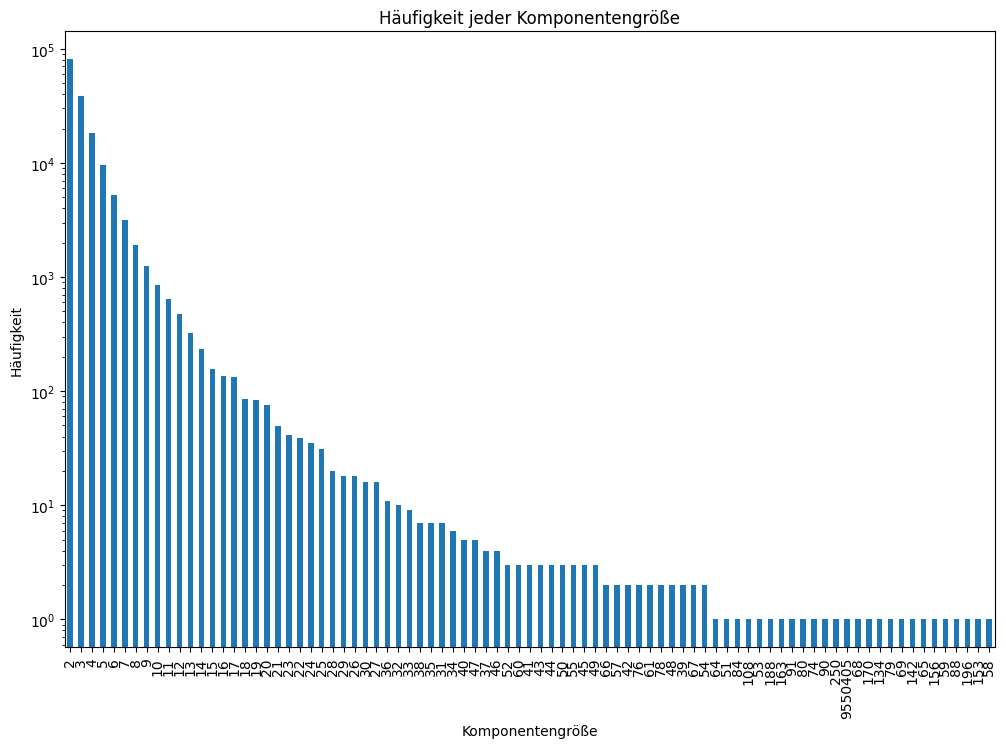

In [6]:
plt.figure(figsize=(12, 8))

# Calculate the frequency of each component size, including the outlier.
component_counts_including_outlier = df['Component_Size'].value_counts()

# Create a bar plot for the frequency of each component size with a logarithmic scale
component_counts_including_outlier.plot(kind='bar')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Häufigkeit jeder Komponentengröße')
plt.xlabel('Komponentengröße')
plt.ylabel('Häufigkeit')
plt.savefig("test.svg")
plt.show()

In [13]:
import time
start_time = time.time()

df = pd.read_csv("dataset_filtering.csv")

end_time = time.time()

time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um die CSV-Datei in ein DataFrame zu lesen.")

Es dauerte 88.34577202796936 Sekunden, um die CSV-Datei in ein DataFrame zu lesen.


In [14]:
df

,key,authors,Gradverteilungen_author,Gradverteilungen_key,year
0,reference/vision/Singh14,Manish Singh 0001,14,1,2014
1,reference/vision/Wong14,Tien-Tsin Wong,207,1,2014
2,reference/vision/Pont14b,Sylvia C. Pont,49,1,2014
3,reference/vision/Alexander14,Daniel C. Alexander,236,1,2014
4,reference/vision/Fukui14,Kazuhiro Fukui,110,1,2014
...,...,...,...,...,...
21620032,persons/Codd71b,E. F. Codd,51,1,1971
21620033,persons/Codd71,E. F. Codd,51,1,1971
21620034,persons/Hall74,Patrick A. V. Hall,29,1,1974
21620035,persons/Codd69,E. F. Codd,51,1,1969


In [16]:
min_year = df['year'].min()
max_year = df['year'].max()

In [17]:
min_year

1936

In [18]:
max_year

2024

In [19]:
df_filtered = df[(df['year'] >= 1936) & (df['year'] <= 2019)]

# Selecting only 'key' and 'authors' columns
df_selected = df_filtered[['key', 'authors']]

# Showing the final DataFrame
df_selected.head()

,key,authors
0,reference/vision/Singh14,Manish Singh 0001
1,reference/vision/Wong14,Tien-Tsin Wong
2,reference/vision/Pont14b,Sylvia C. Pont
3,reference/vision/Alexander14,Daniel C. Alexander
4,reference/vision/Fukui14,Kazuhiro Fukui


In [21]:
df_selected

,key,authors
0,reference/vision/Singh14,Manish Singh 0001
1,reference/vision/Wong14,Tien-Tsin Wong
2,reference/vision/Pont14b,Sylvia C. Pont
3,reference/vision/Alexander14,Daniel C. Alexander
4,reference/vision/Fukui14,Kazuhiro Fukui
...,...,...
21620032,persons/Codd71b,E. F. Codd
21620033,persons/Codd71,E. F. Codd
21620034,persons/Hall74,Patrick A. V. Hall
21620035,persons/Codd69,E. F. Codd


In [25]:
df_selected.to_csv('dataset_filtering_years.csv', index=False)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import time
start_time = time.time()

df = pd.read_csv("dataset.csv")

end_time = time.time()

time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um die CSV-Datei in ein DataFrame zu lesen.")

Es dauerte 53.64260649681091 Sekunden, um die CSV-Datei in ein DataFrame zu lesen.


In [4]:
len(df)

22006597

In [6]:
df[:10]

,key,authors,Gradverteilungen_author,Gradverteilungen_key,year
0,reference/vision/Singh14,Manish Singh 0001,14,1,2014
1,reference/vision/Wong14,Tien-Tsin Wong,207,1,2014
2,reference/vision/Pont14b,Sylvia C. Pont,49,1,2014
3,reference/vision/Alexander14,Daniel C. Alexander,236,1,2014
4,reference/vision/Fukui14,Kazuhiro Fukui,110,1,2014
5,reference/vision/SrivastavaPKTA14,Gaurav Srivastava 0004,15,5,2014
6,reference/vision/SrivastavaPKTA14,Johnny Park,37,5,2014
7,reference/vision/SrivastavaPKTA14,Avinash C. Kak,162,5,2014
8,reference/vision/SrivastavaPKTA14,Birgi Tamersoy,15,5,2014
9,reference/vision/SrivastavaPKTA14,J. K. Aggarwal,121,5,2014


In [15]:
author_stats = {
    'min': df['Gradverteilungen_author'].min(),
    'max': df['Gradverteilungen_author'].max(),
    'avg': df['Gradverteilungen_author'].mean()
}

key_stats = {
    'min': df['Gradverteilungen_key'].min(),
    'max': df['Gradverteilungen_key'].max(),
    'avg': df['Gradverteilungen_key'].mean()
}

author_stats, key_stats

({'min': 1, 'max': 2762, 'avg': 82.14820683088803},
 {'min': 1, 'max': 449, 'avg': 4.622289852447428})

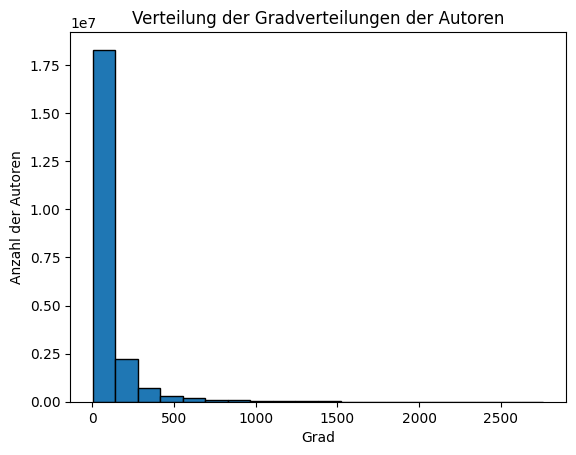

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
grad_data_author = df['Gradverteilungen_author']



# Histogramm
grad_data_author.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Autoren')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Autoren')
plt.show()

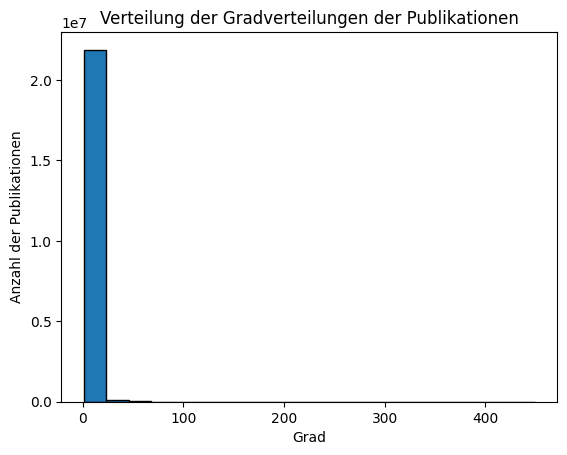

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
grad_data_author = df['Gradverteilungen_key']
# Histogramm
grad_data_author.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Publikationen')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Publikationen')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
grad_data_author = df['Gradverteilungen_author']



# Histogramm
grad_data_author.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Autoren )')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Autoren')
plt.show()

In [14]:
max_grad_index = df['Gradverteilungen_author'].idxmax()

# Finden Sie den Namen des Autors und den Wert der Gradverteilung
max_grad_author = df.loc[max_grad_index, 'authors']
max_grad_value = df.loc[max_grad_index, 'Gradverteilungen_author']
print(f"Autor: {max_grad_author}, Gradverteilung: {max_grad_value}")

Autor: H. Vincent Poor, Gradverteilung: 2762


### 4-Depth Betimmen

In [16]:
import time
start_time = time.time()

df_filt = pd.read_csv("dataset_filtering.csv")

end_time = time.time()

time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um die CSV-Datei in ein DataFrame zu lesen.")

Es dauerte 9.940184116363525 Sekunden, um die CSV-Datei in ein DataFrame zu lesen.


In [20]:
df_filt=df_filt[['key','authors']]

In [21]:
df_filt

,key,authors
0,reference/vision/Singh14,Manish Singh 0001
1,reference/vision/Wong14,Tien-Tsin Wong
2,reference/vision/Pont14b,Sylvia C. Pont
3,reference/vision/Alexander14,Daniel C. Alexander
4,reference/vision/Fukui14,Kazuhiro Fukui
...,...,...
21620032,persons/Codd71b,E. F. Codd
21620033,persons/Codd71,E. F. Codd
21620034,persons/Hall74,Patrick A. V. Hall
21620035,persons/Codd69,E. F. Codd


In [ ]:
data = {
    'key': ['conf/iccma/OsmanJZ22', 'conf/iccma/OsmanJZ22', 'conf/iccma/OsmanJZ22',
            'conf/ficloud/IsmailYOEAO19', 'conf/ficloud/IsmailYOEAO19', 'conf/ficloud/IsmailYOEAO19',
            'conf/ficloud/IsmailYOEAO19', 'conf/ficloud/IsmailYOEAO19', 'conf/ficloud/IsmailYOEAO19',
            'conf/icecs/OsmanE09', 'conf/icecs/OsmanE09'],
    'authors': ['Ahmad Farimin Ahmad Osman', 'Ahmad Hafiz Mohd Jamil', 'Shamsul Zakaria',
                'Fatimah Zaharah Ismail', 'Nor Hafizi Yusof', 'Ahmad Farimin Ahmad Osman',
                'Rahimah Embong', 'Mohamed Fathy Mohamed Abdelgelil', 'Najmiah Omar',
                'Ahmad Farimin Ahmad Osman', 'Nordin Endut']
}

In [23]:
import pandas as pd
import networkx as nx
from itertools import combinations
from tqdm import tqdm
# Ihr DataFrame
df = df_filt

# Erstellen eines Graphen
G = nx.Graph()
for key, group in tqdm(df.groupby('key'), desc="Verarbeite Gruppen"):
    authors = group['authors'].tolist()
    for author1, author2 in combinations(authors, 2):
        G.add_edge(author1, author2)


Verarbeite Gruppen: 100%|██████████████████████████████████████████████████| 6426541/6426541 [02:57<00:00, 36190.31it/s]


In [28]:
# Funktion zum Berechnen der Abstände für einen spezifischen Autor
def calculate_distances_for_author(G, author):
    return nx.single_source_shortest_path_length(G, author)

# Berechnen der Abstände für einen spezifischen Autor
specific_author = 'Luca Amyn Hattouti'  
distances = calculate_distances_for_author(G, specific_author)

In [29]:
distances

{'Luca Amyn Hattouti': 0,
 'Roberto Di Rienzo': 1,
 'Federico Baronti': 1,
 'Roberto Roncella': 1,
 'Roberto Saletti': 1,
 'Gianluca Aurilio': 1,
 'Riccardo Di Dio': 1,
 'Walter Nesci': 1,
 'Gianluca Simonte': 2,
 'Andrea Carloni': 2,
 'Stefano Constà': 2,
 'Manlio Pasquali': 2,
 'Niccolò Nicodemo': 2,
 'Alessandro Verani': 2,
 'Daniele Bellucci': 2,
 'Marco Zeni': 2,
 'Ian Biagioni': 2,
 'Pietro Nannipieri': 2,
 'Martina Anichini': 2,
 'Lorenzo Barsocchi': 2,
 'Giulia Becatti': 2,
 'Luca Buoni': 2,
 'Andrea Catarsi': 2,
 'Federico Celi': 2,
 'Paolo Di Giorgio': 2,
 'Paolo Fattibene': 2,
 'Eugenio Ferrato': 2,
 'Pietro Guardati': 2,
 'Edoardo Mancini': 2,
 'Gabriele Meoni': 2,
 'Federico Nesti': 2,
 'Stefano Piaquadio': 2,
 'Edoardo Pratelli': 2,
 'Lorenzo Quadrelli': 2,
 'Alessandro Simone Viglione': 2,
 'Francesco Zanaboni': 2,
 'Carlo Bartoli': 2,
 'Paolo Di Marco': 2,
 'Salvo Marcuccio': 2,
 'Luca Fanucci': 2,
 'Mauro Mameli': 2,
 'Sauro Filippeschi': 2,
 'Rocco Morello': 2,
 'R. S

In [ ]:

# Funktion zum Berechnen der Abstände für einen spezifischen Autor
def calculate_distances_for_author(G, author):
    return nx.single_source_shortest_path_length(G, author)

# Berechnen der Abstände für einen spezifischen Autor
specific_author = 'Nordin Endut'  
distances = calculate_distances_for_author(G, specific_author)


#### 4-1 find a component name

In [4]:
import json

# Pfad zur JSON-Datei
file_path = 'components_info.json'

# Öffnen und Lesen der JSON-Datei
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)


In [5]:
def find_keys_for_name(name, json_data):
    keys = []
    for component in json_data:
        if name in component["Nodes"]:
            # Nur Schlüssel mit '/' hinzufügen
            keys.extend([node for node in component["Nodes"] if '/' in node])
    return keys    

In [15]:
test= find_keys_for_name("Klaus Vogt",data)

In [17]:
test[:4]

['journals/comsis/FanG21',
 'conf/cmg/Ferrari77',
 'journals/complexity/Naddaf-ShNZDREB22',
 'journals/tsmc/WuF12']

In [25]:
import pandas as pd

# Filtern des DataFrames, um nur die Zeilen zu erhalten, deren Key in der Liste enthalten ist
filtered_df = df[df['key'].isin(test)]

In [26]:
filtered_df

,key,authors,Gradverteilungen_author,Gradverteilungen_key,year
0,reference/vision/Singh14,Manish Singh 0001,14,1,2014
1,reference/vision/Wong14,Tien-Tsin Wong,207,1,2014
2,reference/vision/Pont14b,Sylvia C. Pont,49,1,2014
3,reference/vision/Alexander14,Daniel C. Alexander,236,1,2014
4,reference/vision/Fukui14,Kazuhiro Fukui,110,1,2014
...,...,...,...,...,...
22006592,persons/Codd71b,E. F. Codd,51,1,1971
22006593,persons/Codd71,E. F. Codd,51,1,1971
22006594,persons/Hall74,Patrick A. V. Hall,29,1,1974
22006595,persons/Codd69,E. F. Codd,51,1,1969


In [27]:
filtered_df.to_csv('dataset_filtering.csv', index=False)

In [6]:
def find_keys_for_name(name, json_data):
    keys = []
    for component in json_data:
        if name in component["Nodes"]:
            # Nur Schlüssel mit '/' hinzufügen
            keys.extend([node for node in component["Nodes"] if '/' in node])
    return keys

def get_dataframe_for_name(name, json_data, df):
    keys = find_keys_for_name(name, json_data)
    # DataFrame filtern, um nur die entsprechenden Autoren zu erhalten
    filtered_df = df[df['key'].apply(lambda x: any(key in x for key in keys))]
    return filtered_df[['key', 'authors']]


In [9]:
def find_keys_for_name(name, json_data):
    keys = set()  # Verwendung eines Sets für bessere Performance
    for component in json_data:
        if name in component["Nodes"]:
            keys.update(node for node in component["Nodes"] if '/' in node)
    return keys

def get_dataframe_for_name(name, json_data, df):
    keys = find_keys_for_name(name, json_data)
    keys_set = set(keys)  
    df['key_in_set'] = df['key'].apply(lambda x: any(key in x for key in keys_set))
    filtered_df = df[df['key_in_set']]
    return filtered_df[['key', 'authors']]


In [9]:
import time
df_test=df
start_time = time.time()

test=get_dataframe_for_name("Yoko Kawai",data,df)

end_time = time.time()
time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um das  DataFrame zu erstellen.")
test

Es dauerte 15.756085634231567 Sekunden, um das  DataFrame zu erstellen.


,key,authors
399384,conf/eca/PharhizgarL94,Kamal Dean Pharhizgar
399385,conf/eca/PharhizgarL94,Stephen E. Lunce
15424592,journals/imds/LunceLKM06,Stephen E. Lunce
15424593,journals/imds/LunceLKM06,Leslie M. Lunce
15424594,journals/imds/LunceLKM06,Yoko Kawai
15424595,journals/imds/LunceLKM06,Balasundrum Maniam
15424815,journals/imds/LunceS00,Stephen E. Lunce
15424816,journals/imds/LunceS00,Stephanie A. M. Smith


In [8]:
df_test=df
start_time = time.time()
test=get_dataframe_for_name("Shamsul Zakaria",data,df)
end_time = time.time()
time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um das  DataFrame zu erstellen.")
test

Es dauerte 9.863057851791382 Sekunden, um das  DataFrame zu erstellen.


,key,authors
3043879,conf/iccma/OsmanJZ22,Ahmad Farimin Ahmad Osman
3043880,conf/iccma/OsmanJZ22,Ahmad Hafiz Mohd Jamil
3043881,conf/iccma/OsmanJZ22,Shamsul Zakaria
6637162,conf/ficloud/IsmailYOEAO19,Fatimah Zaharah Ismail
6637163,conf/ficloud/IsmailYOEAO19,Nor Hafizi Yusof
6637164,conf/ficloud/IsmailYOEAO19,Ahmad Farimin Ahmad Osman
6637165,conf/ficloud/IsmailYOEAO19,Rahimah Embong
6637166,conf/ficloud/IsmailYOEAO19,Mohamed Fathy Mohamed Abdelgelil
6637167,conf/ficloud/IsmailYOEAO19,Najmiah Omar
8895384,conf/icecs/OsmanE09,Ahmad Farimin Ahmad Osman


In [ ]:
df_test=df
start_time = time.time()
test=get_dataframe_for_name("K. Aziz",data,df)
end_time = time.time()
time_load = end_time - start_time
print(f"Es dauerte {time_load} Sekunden, um das  DataFrame zu erstellen.")
test

In [ ]:
test.to_csv('dataset-filtered.csv', index=False)

In [24]:
df=test[:5]
df

,key,authors
399384,conf/eca/PharhizgarL94,Kamal Dean Pharhizgar
399385,conf/eca/PharhizgarL94,Stephen E. Lunce
15424592,journals/imds/LunceLKM06,Stephen E. Lunce
15424593,journals/imds/LunceLKM06,Leslie M. Lunce
15424594,journals/imds/LunceLKM06,Yoko Kawai


In [30]:
data = {
    'key': ['reference/vision/Singh14', 'reference/vision/Wong14', 'reference/vision/Pont14b', 'reference/other/Maroo15','reference/other/Maroo14'],
    'authors': [['Maroo2','Sylvia C. Pont'],['Manish Singh 0001', 'Tien-Tsin Wong', 'Manish Singh 0002'], ['Tien-Tsin Wong', 'Sylvia C. Pont'], ['Sylvia C. Pont', 'Manish Singh 0001'], ['Manish Singh 0002', 'Maroo']]
}
df = pd.DataFrame(data)
df

,key,authors
0,reference/vision/Singh14,"[Maroo2, Sylvia C. Pont]"
1,reference/vision/Wong14,"[Manish Singh 0001, Tien-Tsin Wong, Manish Sin..."
2,reference/vision/Pont14b,"[Tien-Tsin Wong, Sylvia C. Pont]"
3,reference/other/Maroo15,"[Sylvia C. Pont, Manish Singh 0001]"
4,reference/other/Maroo14,"[Manish Singh 0002, Maroo]"


In [34]:
test

,key,authors
399384,conf/eca/PharhizgarL94,Kamal Dean Pharhizgar
399385,conf/eca/PharhizgarL94,Stephen E. Lunce
15424592,journals/imds/LunceLKM06,Stephen E. Lunce
15424593,journals/imds/LunceLKM06,Leslie M. Lunce
15424594,journals/imds/LunceLKM06,Yoko Kawai
15424595,journals/imds/LunceLKM06,Balasundrum Maniam
15424815,journals/imds/LunceS00,Stephen E. Lunce
15424816,journals/imds/LunceS00,Stephanie A. M. Smith


### Dataframe group


In [35]:
grouped_df = test.groupby('key')['authors'].apply(list).reset_index()
grouped_df.rename(columns={'author': 'authors'}, inplace=True)

grouped_df.head()

,key,authors
0,conf/eca/PharhizgarL94,"[Kamal Dean Pharhizgar, Stephen E. Lunce]"
1,journals/imds/LunceLKM06,"[Stephen E. Lunce, Leslie M. Lunce, Yoko Kawai..."
2,journals/imds/LunceS00,"[Stephen E. Lunce, Stephanie A. M. Smith]"


In [38]:
import pandas as pd

# Beispiel-Datensatz
data = {
    'key': ['reference/vision/Singh14', 'reference/vision/Wong14', 'reference/vision/Pont14b', 'reference/other/Maroo15','reference/other/Maroo14'],
    'authors': [['Maroo2','Sylvia C. Pont'],['Manish Singh 0001', 'Tien-Tsin Wong', 'Manish Singh 0002'], ['Tien-Tsin Wong', 'Sylvia C. Pont'], ['Sylvia C. Pont', 'Manish Singh 0001'], ['Manish Singh 0002', 'Maroo']],
    'year': [2014, 2014, 2014, 2015,2016]
}
#df = pd.DataFrame(data)
df=grouped_df
# Funktion, um die Beziehungen zwischen Autoren zu finden
def find_relations(df, current_author, target_author, visited=None, depth=0, max_depth=5):
    if visited is None:
        visited = set()

    if current_author == target_author:
        return depth

    if depth == max_depth:
        return None

    visited.add(current_author)
    depths = []

    for _, row in df.iterrows():
        if current_author in row['authors']:
            for author in row['authors']:
                if author not in visited:
                    result = find_relations(df, author, target_author, visited.copy(), depth + 1, max_depth)
                    if result is not None:
                        depths.append(result)
    
    if depths:
        return min(depths)
    else:
        return None

specific_author = 'Kamal Dean Pharhizgar'
authors = set(df['authors'].explode().unique())
authors.remove(specific_author)

author_distances = {author: find_relations(df, specific_author, author) for author in authors}

# Erstellen des neuen DataFrames
data_for_df = [[specific_author, author, distance] for author, distance in author_distances.items()]
new_df = pd.DataFrame(data_for_df, columns=['specific_author', 'Name_author', 'abstand'])

new_df


,specific_author,Name_author,abstand
0,Kamal Dean Pharhizgar,Yoko Kawai,2
1,Kamal Dean Pharhizgar,Stephanie A. M. Smith,2
2,Kamal Dean Pharhizgar,Leslie M. Lunce,2
3,Kamal Dean Pharhizgar,Balasundrum Maniam,2
4,Kamal Dean Pharhizgar,Stephen E. Lunce,1


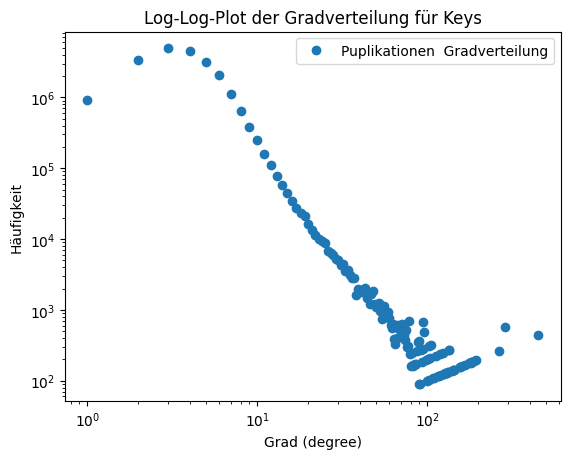

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot für die Gradverteilung der Keys
df_keys = df['Gradverteilungen_key'].value_counts().sort_index()
plt.loglog(df_keys.index, df_keys.values, marker='o', linestyle='none', label='Puplikationen  Gradverteilung')
plt.xlabel('Grad (degree)')
plt.ylabel('Häufigkeit')
plt.title('Log-Log-Plot der Gradverteilung für Keys')
plt.legend()
plt.show()


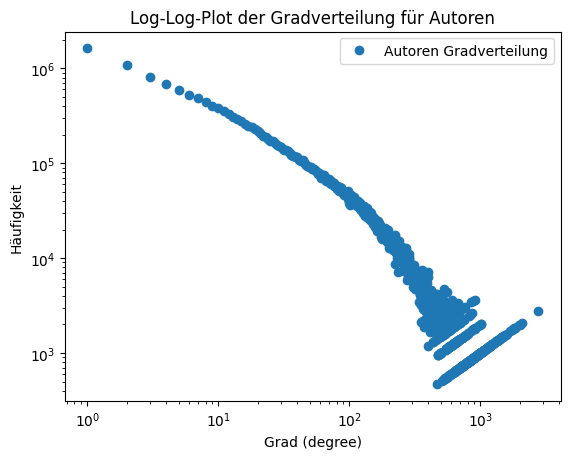

In [8]:
#  Plot für die Gradverteilung der Autoren
df_authors = df['Gradverteilungen_author'].value_counts().sort_index()
plt.loglog(df_authors.index, df_authors.values, marker='o', linestyle='none', label='Autoren Gradverteilung')
plt.xlabel('Grad (degree)')
plt.ylabel('Häufigkeit')
plt.title('Log-Log-Plot der Gradverteilung für Autoren')
plt.legend()
plt.show()


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


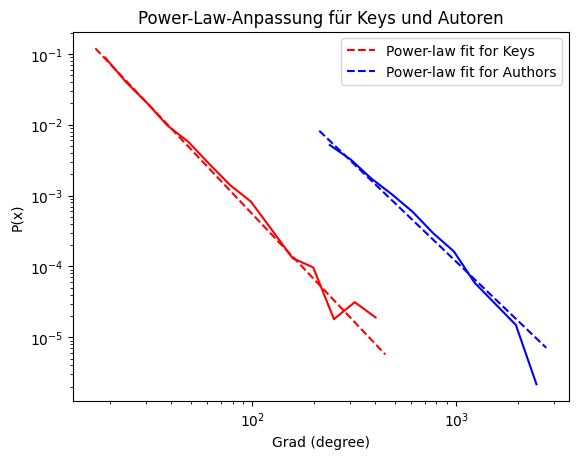

Keys Alpha: 3.039452736892029
Keys Xmin: 17.0
Autoren Alpha: 2.752998327944858
Autoren Xmin: 213.0


In [9]:
import powerlaw

# Analysieren Sie die Gradverteilungen für Keys
data_keys = df['Gradverteilungen_key'].values
data_keys = data_keys[data_keys > 0]  # Entfernen Sie 0 Grad
fit_keys = powerlaw.Fit(data_keys)
fit_keys.power_law.plot_pdf(color='r', linestyle='--', label='Power-law fit for Keys')
fit_keys.plot_pdf(color='r')

# Analysieren Sie die Gradverteilungen für Autoren
data_authors = df['Gradverteilungen_author'].values
data_authors = data_authors[data_authors > 0]  # Entfernen Sie 0 Grad
fit_authors = powerlaw.Fit(data_authors)
fit_authors.power_law.plot_pdf(color='b', linestyle='--', label='Power-law fit for Authors')
fit_authors.plot_pdf(color='b')

plt.xlabel('Grad (degree)')
plt.ylabel('P(x)')
plt.title('Power-Law-Anpassung für Keys und Autoren')
plt.legend()
plt.show()

# Output statistischer Werte
print('Keys Alpha:', fit_keys.power_law.alpha)
print('Keys Xmin:', fit_keys.power_law.xmin)
print('Autoren Alpha:', fit_authors.power_law.alpha)
print('Autoren Xmin:', fit_authors.power_law.xmin)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


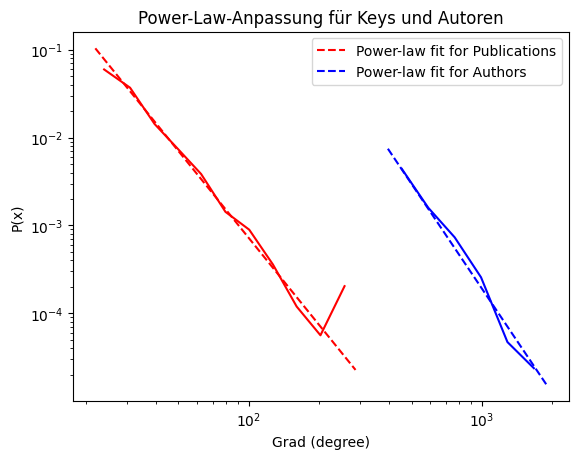

Keys Alpha: 3.2802551626868284
Keys Xmin: 22.0
Autoren Alpha: 3.9492351239504564
Autoren Xmin: 395.0


In [26]:
import powerlaw

# Analysieren Sie die Gradverteilungen für Keys
data_keys = df_selected['Gradverteilungen_key'].values
data_keys = data_keys[data_keys > 0]  # Entfernen Sie 0 Grad
fit_keys = powerlaw.Fit(data_keys)
fit_keys.power_law.plot_pdf(color='r', linestyle='--', label='Power-law fit for Publications')
fit_keys.plot_pdf(color='r')

# Analysieren Sie die Gradverteilungen für Autoren
data_authors = df_selected['Gradverteilungen_author'].values
data_authors = data_authors[data_authors > 0]  # Entfernen Sie 0 Grad
fit_authors = powerlaw.Fit(data_authors)
fit_authors.power_law.plot_pdf(color='b', linestyle='--', label='Power-law fit for Authors')
fit_authors.plot_pdf(color='b')

plt.xlabel('Grad (degree)')
plt.ylabel('P(x)')
plt.title('Power-Law-Anpassung für Keys und Autoren')
plt.legend()
plt.show()

# Output statistischer Werte
print('Keys Alpha:', fit_keys.power_law.alpha)
print('Keys Xmin:', fit_keys.power_law.xmin)
print('Autoren Alpha:', fit_authors.power_law.alpha)
print('Autoren Xmin:', fit_authors.power_law.xmin)

In [11]:


# Goodness-of-Fit-Test für Keys
ks_keys, p_value_keys = fit_keys.distribution_compare('power_law', 'exponential')
print('Keys - KS-Statistik:', ks_keys, 'p-Wert:', p_value_keys)

# Vergleich mit einer Exponentialverteilung für Keys
R_keys, p_keys = fit_keys.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('Keys - Likelihood Ratio:', R_keys, 'p-Wert:', p_keys)

# Goodness-of-Fit-Test für Autoren
ks_authors, p_value_authors = fit_authors.distribution_compare('power_law', 'exponential')
print('Autoren - KS-Statistik:', ks_authors, 'p-Wert:', p_value_authors)

# Vergleich mit einer Exponentialverteilung für Autoren
R_authors, p_authors = fit_authors.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('Autoren - Likelihood Ratio:', R_authors, 'p-Wert:', p_authors)


Keys - KS-Statistik: 45158.6606940128 p-Wert: 0.0
Keys - Likelihood Ratio: 90.18858325515889 p-Wert: 0.0
Autoren - KS-Statistik: 33472.68344122321 p-Wert: 0.0
Autoren - Likelihood Ratio: 50.474060043567796 p-Wert: 0.0


In [9]:
degrees = df['Gradverteilungen_author'].to_numpy()

# Erstellen Sie ein Fit-Objekt mit der powerlaw-Bibliothek
fit = powerlaw.Fit(degrees)

# Berechnen Sie die Wahrscheinlichkeiten für verschiedene Grade nach der Power-Law-Formel
ks = np.arange(1, max(degrees) + 1) # mögliche Grade
ps = fit.power_law.pdf(ks) # Wahrscheinlichkeiten nach der Power-Law-Formel

Calculating best minimal value for power law fit


In [12]:
print(len(ks))
print(len(ps))

2762
2550


### 2.Power law model training 

#### 2.1 load Json  file

In [5]:
json_file_path = 'year_dataset.json'

# Lesen der JSON-Datei
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

In [6]:
key_year_map = {item['key']: item['year'] for item in json_data}

In [7]:
df['year'] = df['key'].map(key_year_map)

In [15]:
df[:10]

,key,authors,Gradverteilungen_author,Gradverteilungen_key,year
0,reference/vision/Singh14,Manish Singh 0001,14,1,2014
1,reference/vision/Wong14,Tien-Tsin Wong,207,1,2014
2,reference/vision/Pont14b,Sylvia C. Pont,49,1,2014
3,reference/vision/Alexander14,Daniel C. Alexander,236,1,2014
4,reference/vision/Fukui14,Kazuhiro Fukui,110,1,2014
5,reference/vision/SrivastavaPKTA14,Gaurav Srivastava 0004,15,5,2014
6,reference/vision/SrivastavaPKTA14,Johnny Park,37,5,2014
7,reference/vision/SrivastavaPKTA14,Avinash C. Kak,162,5,2014
8,reference/vision/SrivastavaPKTA14,Birgi Tamersoy,15,5,2014
9,reference/vision/SrivastavaPKTA14,J. K. Aggarwal,121,5,2014


In [6]:
test_year_start = df['year'].max() - 5
train_df = df[df['year'] < test_year_start]
test_df = df[df['year'] >= test_year_start]

In [9]:
test_df[:19]

,key,authors,Gradverteilungen_author,Gradverteilungen_key,year
12609,reference/sp/KoprinskaY22,Irena Koprinska,139,2,2022
12610,reference/sp/KoprinskaY22,Kalina Yacef,110,2,2022
12638,reference/sp/SchedlKMB22,Markus Schedl,282,4,2022
12639,reference/sp/SchedlKMB22,Peter Knees,108,4,2022
12640,reference/sp/SchedlKMB22,Brian McFee,68,4,2022
12641,reference/sp/SchedlKMB22,Dmitry Bogdanov,47,4,2022
12691,reference/sp/Ekstrand0B022,Michael D. Ekstrand,88,4,2022
12692,reference/sp/Ekstrand0B022,Anubrata Das 0001,22,4,2022
12693,reference/sp/Ekstrand0B022,Robin Burke,105,4,2022
12694,reference/sp/Ekstrand0B022,Fernando Diaz 0001,151,4,2022


In [7]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 45.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.5 MB/s eta 0:00:00


In [13]:
selected_authors = df[df['Gradverteilungen_author'] == 10]['authors'].unique()
selected_authors=selected_authors[0]
selected_authors

'Sushil Mittal'

In [11]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(G)

# Speichern Sie das JSON-Format in einer Datei
with open('network10.json', 'w') as f:
    json.dump(data, f, indent=4)

Calculating best minimal value for power law fit


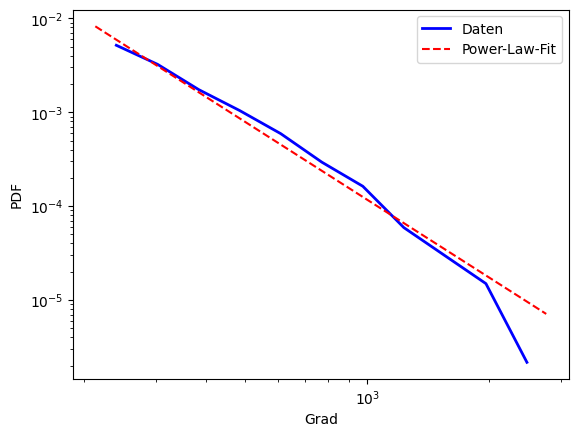

In [14]:
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
# Angenommen, df ist Ihr DataFrame, der die Gradverteilung enthält
# Sie können die Gradwerte in ein Numpy-Array konvertieren
degrees = df['Gradverteilungen_author'].to_numpy()

# Erstellen Sie ein Fit-Objekt mit der powerlaw-Bibliothek
fit = powerlaw.Fit(degrees)

# Plotten Sie die PDF der Daten und die Power-Law-Kurve
fig = fit.plot_pdf(color='b', linewidth=2, label='Daten')
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig, label='Power-Law-Fit')

# Fügen Sie eine Legende und Achsenbeschriftungen hinzu
plt.legend()
plt.xlabel('Grad')
plt.ylabel('PDF')
plt.show()


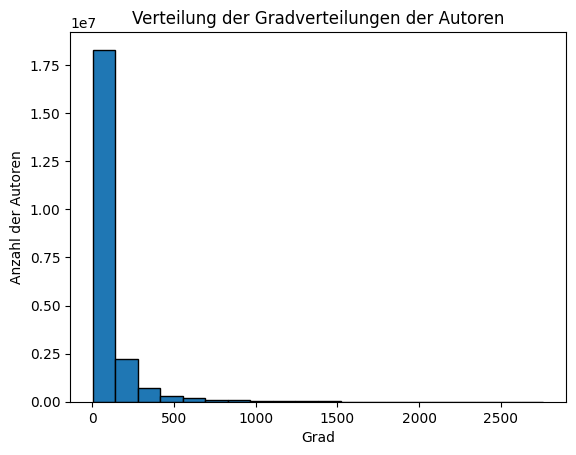

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

grad_data_author = df['Gradverteilungen_author']

# Histogramm
plt.hist(grad_data_author, bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Autoren')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Autoren')
plt.show()

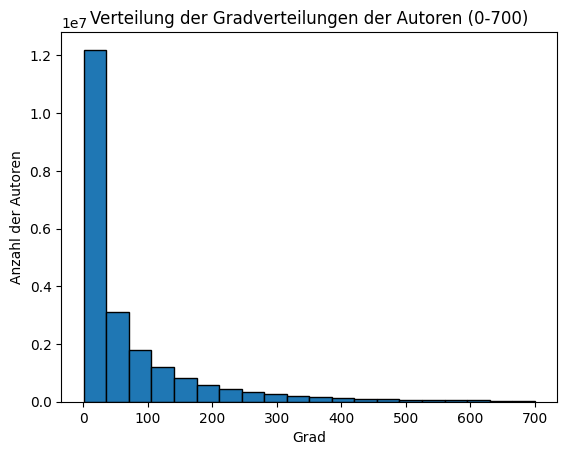

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
grad_data_author = df['Gradverteilungen_author']

# Filtern Sie die Daten im Bereich von 0 bis 700
filtered_data = grad_data_author[(grad_data_author >= 0) & (grad_data_author <= 700)]

# Histogramm
filtered_data.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Autoren (0-700)')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Autoren')
plt.show()

### Gradverteilung der Keys

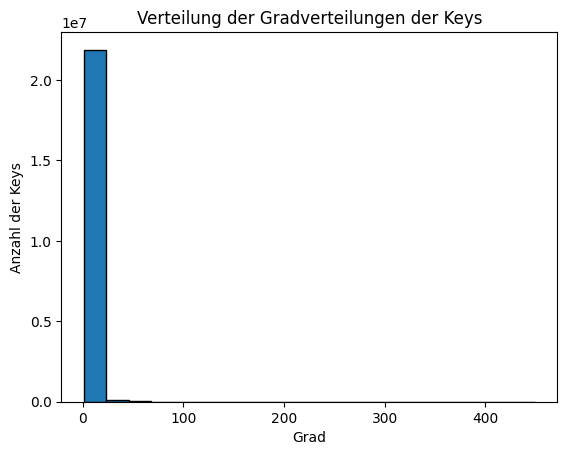

In [14]:
grad_data_author = df['Gradverteilungen_key']

# Histogramm
plt.hist(grad_data_author, bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Keys')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Keys')
plt.show()

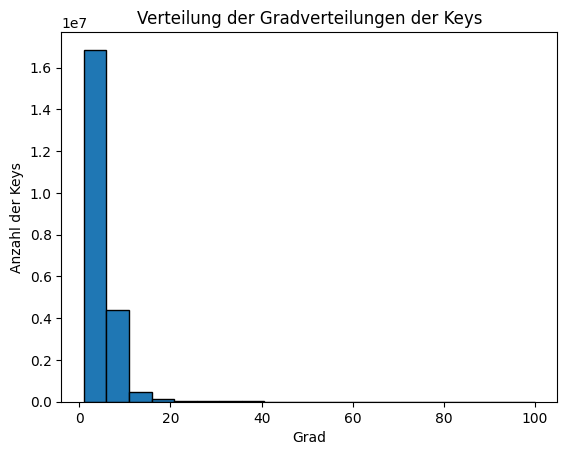

In [15]:
grad_data_author = df['Gradverteilungen_key']
filtered_data = grad_data_author[(grad_data_author >= 0) & (grad_data_author <= 100)]
plt.hist(filtered_data, bins=20, edgecolor='black')
plt.title('Verteilung der Gradverteilungen der Keys')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Keys')
plt.show()

In [18]:
grad_data_author_numeric = pd.to_numeric(df['Gradverteilungen_key'], errors='coerce')
max_value_numeric = grad_data_author_numeric.max()

print("Die numerisch größte Zahl in der Spalte 'Gradverteilungen_author' ist:", max_value_numeric)


Die numerisch größte Zahl in der Spalte 'Gradverteilungen_author' ist: 449


In [17]:
import pandas as pd

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
grad_data_author = df['Gradverteilungen_key']

# Finden Sie den Index des maximalen Werts in der Spalte
index_of_max_value = grad_data_author.idxmax()

# Finden Sie den Wert des Schlüssels in dieser Zeile
key_of_max_value = df.loc[index_of_max_value, 'key']

print("Der Name (Schlüssel) der Zeile mit dem größten Wert in der Spalte 'Gradverteilungen_author' ist:", key_of_max_value)


Der Name (Schlüssel) der Zeile mit dem größten Wert in der Spalte 'Gradverteilungen_author' ist: journals/nature/TurroAMGGSASFTS20


### PLotting

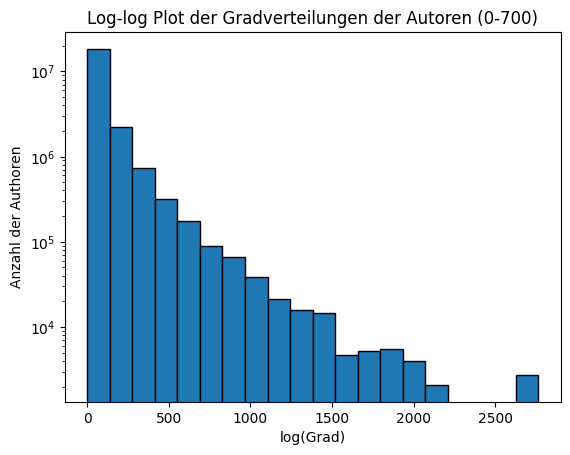

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
filtered_data = df['Gradverteilungen_author']

# Plotten des Histogramms im doppelt logarithmischen Diagramm
plt.hist(filtered_data, bins=20, edgecolor='black', log=True)

plt.title('Log-log Plot der Gradverteilungen der Autoren (0-700)')
plt.xlabel('log(Grad)')
plt.ylabel('Anzahl der Authoren')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# Annahme: grad_data_author enthält Ihre Gradverteilungsdaten der Autoren
results_author = powerlaw.fit(grad_data_author + 1)  # +1, um sicherzustellen, dass keine Nullwerte auftreten

# Plotten der Daten und des Power-Law-Fits auf doppelt logarithmischer Skala
x_author = np.linspace(1, len(grad_data_author), len(grad_data_author))
plt.scatter(x_author, grad_data_author, alpha=0.5, label='Datenpunkte Autoren')
plt.plot(x_author, powerlaw.pdf(x_author, *results_author[1:]), color='red', label='Power-Law Fit Autoren')
plt.xscale('log')
plt.yscale('log')
plt.title('Power-Law-Fit auf doppelt logarithmischer Skala (Autoren)')
plt.xlabel('Log(Grad)')
plt.ylabel('Log(Häufigkeit)')
plt.legend()
plt.show()


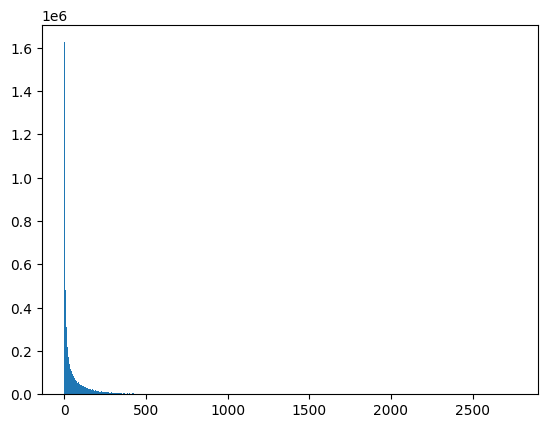

In [13]:
import numpy as np
ages = df['Gradverteilungen_author'].astype(int)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(ages, bins=np.max(ages) - np.min(ages))
plt.show()

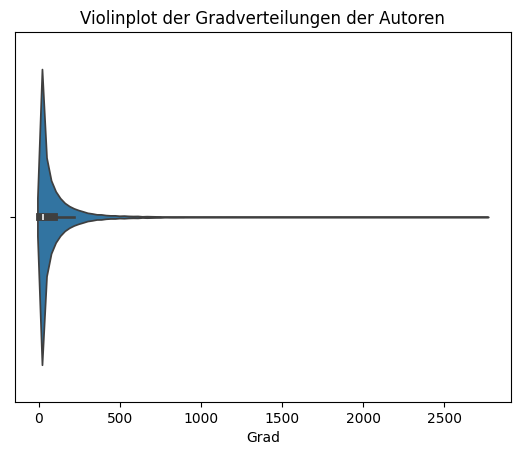

In [11]:
sns.violinplot(x=grad_data_author)
plt.title('Violinplot der Gradverteilungen der Autoren')
plt.xlabel('Grad')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import powerlaw

# Annahme: Ihr DataFrame heißt df und die Spalte 'Gradverteilungen_author' enthält die Gradinformationen
grad_data_author = df['Gradverteilungen_author']

# Filtern Sie die Daten im Bereich von 0 bis 700
filtered_data = grad_data_author[(grad_data_author >= 0) & (grad_data_author <= 700)]

# Power-Law-Fit
results_author = powerlaw.fit(filtered_data + 1)  # +1, um sicherzustellen, dass keine Nullwerte auftreten

# Plotten der Daten und des Power-Law-Fits auf doppelt logarithmischer Skala
x_author = np.linspace(1, len(filtered_data), len(filtered_data))
plt.scatter(x_author, filtered_data, alpha=0.5, label='Datenpunkte Autoren')
plt.plot(x_author, powerlaw.pdf(x_author, *results_author[1:]), color='red', label='Power-Law Fit Autoren')
plt.xscale('log')
plt.yscale('log')
plt.title('Power-Law-Fit auf doppelt logarithmischer Skala (Autoren)')
plt.xlabel('Log(Grad)')
plt.ylabel('Log(Häufigkeit)')
plt.legend()
plt.show()


/home/smmaloua/environments/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


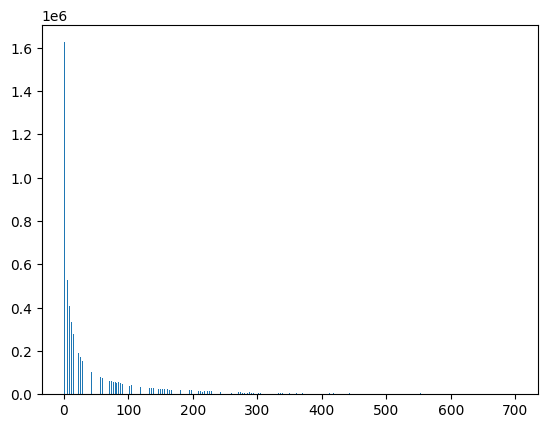

In [16]:
import numpy as np
ages = df['Gradverteilungen_author'].astype(int)
filtered_data = ages[(ages >= 0) & (ages <= 700)]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(filtered_data, bins=np.max(ages) - np.min(ages))
plt.show()

In [13]:
from IPython.display import display, Markdown
import networkx as nx
import pandas as pd
from tqdm import tqdm
# Beispiel: Laden Sie die Daten in ein Pandas DataFrame
# Sie sollten diesen Schritt an Ihre Datenstruktur anpassen

# Erstellen Sie einen leeren bipartiten Graphen
G = nx.Graph()
start_time = time.time()
# Hinzufügen von Knoten und Kanten zum Graphen basierend auf dem DataFrame
for _, row in tqdm(df.iterrows(), total=len(df), desc="Verarbeite Daten"):
    G.add_node(row['authors'], bipartite='authors')
    G.add_node(row['key'], bipartite='key')
    G.add_edge(row['authors'], row['key'])
end_time = time.time()
time_network = end_time - start_time
print(f"Es dauerte {time_network} Sekunden, um die Netzwerk zu erstellen")

Verarbeite Daten: 100%|█████████████████████████████████████████████████| 22006597/22006597 [1:06:37<00:00, 5504.66it/s]

Es dauerte 3997.826967716217 Sekunden, um die Netzwerk zu erstellen


In [22]:
from IPython.display import display, Markdown
import networkx as nx
import pandas as pd
from tqdm import tqdm
# Beispiel: Laden Sie die Daten in ein Pandas DataFrame
# Sie sollten diesen Schritt an Ihre Datenstruktur anpassen

# Erstellen Sie einen leeren bipartiten Graphen
G = nx.Graph()
start_time = time.time()
# Hinzufügen von Knoten und Kanten zum Graphen basierend auf dem DataFrame
for _, row in tqdm(df_selected.iterrows(), total=len(df_selected), desc="Verarbeite Daten"):
    G.add_node(row['authors'], bipartite='authors')
    G.add_node(row['key'], bipartite='key')
    G.add_edge(row['authors'], row['key'])
end_time = time.time()
time_network = end_time - start_time
print(f"Es dauerte {time_network} Sekunden, um die Netzwerk zu erstellen")

Verarbeite Daten: 100%|███████████████████████████████████████████████████| 15141740/15141740 [58:16<00:00, 4330.22it/s]

Es dauerte 3496.7799491882324 Sekunden, um die Netzwerk zu erstellen


In [ ]:
output_file_path = "network2.gexf"
nx.write_gexf(G, output_file_path)

In [ ]:
# Speichern des Netzwerkgraphen in GraphML-Format
output_file_path = "network2.gexf"
try:
    nx.write_gexf(G, output_file_path)
    print(f"Graph saved successfully to {output_file_path}")
except Exception as e:
    print(f"Error while saving the graph: {e}")



In [17]:
from concurrent.futures import ThreadPoolExecutor
start_time = time.time()
# Function to calculate degree distribution for a node type
def calculate_degree(node_type):
    return node_type, dict(G.degree(G.nodes(node_type)))

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    # Calculate degree distributions for authors and publications in parallel
    authors_future = executor.submit(calculate_degree, 'authors')
    publications_future = executor.submit(calculate_degree, 'key')

    # Retrieve the results
    authors_degrees = authors_future.result()
    publication_degrees = publications_future.result()

# Add degree distributions to the DataFrame
df['authors_degrees'] = df['authors'].map(authors_degrees[1].get)
df['publication_degrees'] = df['key'].map(publication_degrees[1].get)
time_network = end_time - start_time
print(f"Es dauerte {time_network} Sekunden, um Gradverteilungen zu bestimmen")

Es dauerte -1090.1065156459808 Sekunden, um Gradverteilungen zu bestimmen


In [19]:
df = df.drop(['authors_degrees', 'publication_degrees'], axis=1)

In [20]:
df[:10]

,key,authors
0,reference/vision/Singh14,Manish Singh 0001
1,reference/vision/Wong14,Tien-Tsin Wong
2,reference/vision/Pont14b,Sylvia C. Pont
3,reference/vision/Alexander14,Daniel C. Alexander
4,reference/vision/Fukui14,Kazuhiro Fukui
5,reference/vision/SrivastavaPKTA14,Gaurav Srivastava 0004
6,reference/vision/SrivastavaPKTA14,Johnny Park
7,reference/vision/SrivastavaPKTA14,Avinash C. Kak
8,reference/vision/SrivastavaPKTA14,Birgi Tamersoy
9,reference/vision/SrivastavaPKTA14,J. K. Aggarwal


In [24]:
df_selected[:10]

,key,authors,Gradverteilungen_author,Gradverteilungen_key
0,reference/vision/Singh14,Manish Singh 0001,13,1
1,reference/vision/Wong14,Tien-Tsin Wong,167,1
2,reference/vision/Pont14b,Sylvia C. Pont,37,1
3,reference/vision/Alexander14,Daniel C. Alexander,143,1
4,reference/vision/Fukui14,Kazuhiro Fukui,74,1
5,reference/vision/SrivastavaPKTA14,Gaurav Srivastava 0004,14,5
6,reference/vision/SrivastavaPKTA14,Johnny Park,37,5
7,reference/vision/SrivastavaPKTA14,Avinash C. Kak,145,5
8,reference/vision/SrivastavaPKTA14,Birgi Tamersoy,13,5
9,reference/vision/SrivastavaPKTA14,J. K. Aggarwal,121,5


In [21]:
# Gradverteilungen bestimmen
start_time = time.time()
authors_degrees = dict(G.degree(df['authors'].unique()))
publication_degrees = dict(G.degree(df['key'].unique()))
df['Gradverteilungen_author'] = df['authors'].map(authors_degrees)
df['Gradverteilungen_key'] = df['key'].map(publication_degrees)
end_time = time.time()
time_network = end_time - start_time
print(f"Es dauerte {time_network} Sekunden, um Gradverteilungen zu bestimmen")

Es dauerte 96.14851331710815 Sekunden, um Gradverteilungen zu bestimmen


In [22]:
df[:10]

,key,authors,Gradverteilungen_author,Gradverteilungen_key
0,reference/vision/Singh14,Manish Singh 0001,14,1
1,reference/vision/Wong14,Tien-Tsin Wong,207,1
2,reference/vision/Pont14b,Sylvia C. Pont,49,1
3,reference/vision/Alexander14,Daniel C. Alexander,236,1
4,reference/vision/Fukui14,Kazuhiro Fukui,110,1
5,reference/vision/SrivastavaPKTA14,Gaurav Srivastava 0004,15,5
6,reference/vision/SrivastavaPKTA14,Johnny Park,37,5
7,reference/vision/SrivastavaPKTA14,Avinash C. Kak,162,5
8,reference/vision/SrivastavaPKTA14,Birgi Tamersoy,15,5
9,reference/vision/SrivastavaPKTA14,J. K. Aggarwal,121,5


In [23]:
df.to_csv('dataset.csv', index=False)

In [25]:
# Bestimmen Sie die Zusammenhangskomponenten
start_time = time.time()

connected_components = list(nx.connected_components(G))

# Bestimmen Sie die Größe jeder Zusammenhangskomponente
component_sizes = [len(component) for component in connected_components]

end_time = time.time()
time_network = end_time - start_time
print(f"Es dauerte {time_network} Sekunden, um Zusammenhangskomponenten zu bestimmen")

Es dauerte 80.37646913528442 Sekunden, um Zusammenhangskomponenten zu bestimmen


In [28]:
component_sizes[:5]

[9550405, 2, 4, 2, 3]

In [26]:
# Erstellen Sie ein DataFrame mit den Größen der Zusammenhangskomponenten
component_sizes_df = pd.DataFrame({'Component_Size': component_sizes})

# Speichern Sie das DataFrame in einer CSV-Datei (oder einem anderen gewünschten Format)
output_file_path = "component_sizes.csv"
component_sizes_df.to_csv(output_file_path, index=False)

In [30]:
import json
start_time = time.time()
# Erstellen Sie eine Liste, um die Informationen zu speichern
components_info = []

# Iterieren Sie durch die Zusammenhangskomponenten
for i, component in enumerate(connected_components, start=1):
    component_info = {
        'Component_Number': i,
        'Nodes': list(component),
        'Size': len(component)
    }
    components_info.append(component_info)

# Speichern Sie die Informationen in einer JSON-Datei
output_file_path = "components_info.json"
with open(output_file_path, 'w') as json_file:
    json.dump(components_info, json_file, indent=2)

end_time = time.time()
time_network = end_time - start_time
print(f"Es dauerte {time_network} Sekunden, um Zusammenhangskomponenten in Json-File zu speichern")

Es dauerte 22.43211531639099 Sekunden, um Zusammenhangskomponenten in Json-File zu speichern


In [33]:
for component_info in components_info[2:5]:
    print(f"Component Number: {component_info['Component_Number']}")
    print(f"Nodes: {component_info['Nodes']}")
    print(f"Size: {component_info['Size']}\n")

Component Number: 3
Nodes: ['Tara Klassen', 'Tim T. Chen', 'reference/cn/Klassen14', 'reference/cn/KlassenC14']
Size: 4

Component Number: 4
Nodes: ['Marion Murray', 'reference/cn/Murray14']
Size: 2

Component Number: 5
Nodes: ['Mitchell Roslin', 'Andrew Brownlee', 'reference/cn/RoslinB14']
Size: 3



In [ ]:
# Statistiken der Publikationskomponenten
publication_components = list(nx.connected_components(G.subgraph(df['key'].unique())))
publication_component_sizes = [len(comp) for comp in publication_components]

# Gradverteilungen und Publikationskomponenten zum DataFrame hinzufügen
df['Gradverteilungen_author'] = df['authors'].map(authors_degrees)
df['Gradverteilungen_key'] = df['key'].map(publication_degrees)
df['key_component_size'] = df['key'].map({node: len(comp) for comp in publication_components for node in comp})

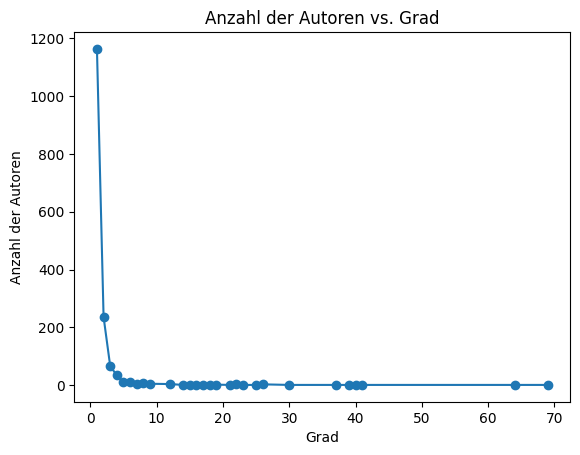

In [14]:
x_values = sorted(list(set(authors_degrees.values())))
y_values = [list(authors_degrees.values()).count(x) for x in x_values]
# Liniendiagramm erstellen
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Anzahl der Autoren vs. Grad')
plt.xlabel('Grad')
plt.ylabel('Anzahl der Autoren')
plt.show()

In [19]:
import community as community_louvain

In [21]:
nx.set_node_attributes(G,partition,'bipartie')

In [22]:
net=Network(notebook=True,width="5000px",height="700px",bgcolor="#222222", font_color="white")
net.from_nx(G)
net.show("Author_communities.html")

Author_communities.html


In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Beispiel: 30.000 Autoren- und 30.000 Publikationsknoten
num_authors = 30000
num_publications = 30000

# Beispiel-Datenframe mit zufälligen Kanten
df = pd.DataFrame({
    'authors': ['Autor{}'.format(i) for i in range(num_authors)],
    'key': ['Publikation{}'.format(i) for i in range(num_publications)]
})

# Erstellen Sie einen leeren bipartiten Graphen
G = nx.Graph()

# Iterieren Sie über die Zeilen des DataFrames und fügen Sie Knoten und Kanten hinzu
for _, row in df.iterrows():
    G.add_node(row['authors'], bipartite='authors')
    G.add_node(row['key'], bipartite='key')
    G.add_edge(row['authors'], row['key'])

# Gradverteilungen bestimmen
author_degrees = dict(G.degree(df['authors'].unique()))
publication_degrees = dict(G.degree(df['key'].unique()))

# Ausgabe der Gradverteilungen
print("Gradverteilung der Autoren:", author_degrees)
print("Gradverteilung der Publikationen:", publication_degrees)



Gradverteilung der Autoren: {'Autor0': 1, 'Autor1': 1, 'Autor2': 1, 'Autor3': 1, 'Autor4': 1, 'Autor5': 1, 'Autor6': 1, 'Autor7': 1, 'Autor8': 1, 'Autor9': 1, 'Autor10': 1, 'Autor11': 1, 'Autor12': 1, 'Autor13': 1, 'Autor14': 1, 'Autor15': 1, 'Autor16': 1, 'Autor17': 1, 'Autor18': 1, 'Autor19': 1, 'Autor20': 1, 'Autor21': 1, 'Autor22': 1, 'Autor23': 1, 'Autor24': 1, 'Autor25': 1, 'Autor26': 1, 'Autor27': 1, 'Autor28': 1, 'Autor29': 1, 'Autor30': 1, 'Autor31': 1, 'Autor32': 1, 'Autor33': 1, 'Autor34': 1, 'Autor35': 1, 'Autor36': 1, 'Autor37': 1, 'Autor38': 1, 'Autor39': 1, 'Autor40': 1, 'Autor41': 1, 'Autor42': 1, 'Autor43': 1, 'Autor44': 1, 'Autor45': 1, 'Autor46': 1, 'Autor47': 1, 'Autor48': 1, 'Autor49': 1, 'Autor50': 1, 'Autor51': 1, 'Autor52': 1, 'Autor53': 1, 'Autor54': 1, 'Autor55': 1, 'Autor56': 1, 'Autor57': 1, 'Autor58': 1, 'Autor59': 1, 'Autor60': 1, 'Autor61': 1, 'Autor62': 1, 'Autor63': 1, 'Autor64': 1, 'Autor65': 1, 'Autor66': 1, 'Autor67': 1, 'Autor68': 1, 'Autor69': 1, '